In [28]:
import pandas as pd 
import numpy as np
import scipy as stats
import matplotlib.pyplot as plt


In [29]:
df = pd.read_csv('2_recoverd_param_lerch_voss_mean_median.csv')

In [30]:
df.insert(3, "v_total = v2 - v1", df['v1_mean']-df['v2_mean'], True)


In [31]:
df.insert(4, "v_bias = v2 + v1", df['v1_mean']+df['v2_mean'], True)


In [32]:
#df.to_csv('with_total_bias_recoverd_param_lerch_voss_mean_median.csv',index=False)


In [33]:
df

,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,zr_mean,a_mean,ndt_mean,sndt_mean,alpha_mean,v1_median,v2_median,zr_median,a_median,ndt_median,sndt_median,alpha_median
0,3024_class_words_part_1.dat,3.045761,-1.886244,4.932004,1.159517,0.490160,1.287587,0.498468,0.016445,1.964707,3.042651,-1.885393,0.489585,1.287625,0.498322,0.015441,1.974194
1,1025_class_words_part_2.dat,4.184019,-3.033869,7.217888,1.150151,0.473132,0.992384,0.452771,-0.001727,1.985501,4.189026,-3.034327,0.473779,0.988134,0.452722,-0.001694,1.996919
2,1011_class_pictures_part_1.dat,1.183248,-2.068872,3.252120,-0.885623,0.448963,0.802030,0.672016,0.068462,1.703470,1.155070,-2.054302,0.449528,0.808815,0.672385,0.069677,1.730916
3,017_class_pictures_part_1.dat,2.160075,-3.854435,6.014510,-1.694360,0.540478,1.334036,0.585844,0.006914,2.002214,2.163931,-3.856982,0.541421,1.324728,0.586148,0.006844,2.011112
4,1004_class_pictures_part_1.dat,1.881073,-1.807869,3.688942,0.073205,0.474254,1.435810,0.582226,-0.004146,2.007113,1.884827,-1.802566,0.472489,1.433489,0.581822,-0.003292,2.010884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,2005_class_pictures_part_1.dat,2.394787,-2.054743,4.449530,0.340045,0.459047,1.476391,0.602516,-0.009770,1.988530,2.384256,-2.050200,0.458715,1.470051,0.603367,-0.008773,1.998020
410,1023_class_pictures_part_1.dat,3.505386,-3.467251,6.972636,0.038135,0.480560,1.472748,0.587795,0.004520,1.914582,3.503307,-3.461909,0.480993,1.425354,0.590417,0.003525,1.937967
411,4012_class_pictures_part_1.dat,2.257025,-1.931329,4.188353,0.325696,0.453542,1.333049,0.496032,-0.005215,1.931201,2.239915,-1.922987,0.453717,1.331196,0.496362,-0.003401,1.942491
412,4012_class_pictures_part_2.dat,2.048675,-3.160632,5.209307,-1.111957,0.555331,1.012809,0.490715,0.020448,1.860695,2.049124,-3.146921,0.556326,1.007626,0.491030,0.020758,1.885833


In [35]:
#consider one session two task
df_word_part_1 = df[df['Experiment'].str.contains('class_words_part_1.')]
pictures_part_1 = df[df['Experiment'].str.contains('class_pictures_part_1.')]
pictures_part_1

,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,zr_mean,a_mean,ndt_mean,sndt_mean,alpha_mean,v1_median,v2_median,zr_median,a_median,ndt_median,sndt_median,alpha_median
2,1011_class_pictures_part_1.dat,1.183248,-2.068872,3.252120,-0.885623,0.448963,0.802030,0.672016,0.068462,1.703470,1.155070,-2.054302,0.449528,0.808815,0.672385,0.069677,1.730916
3,017_class_pictures_part_1.dat,2.160075,-3.854435,6.014510,-1.694360,0.540478,1.334036,0.585844,0.006914,2.002214,2.163931,-3.856982,0.541421,1.324728,0.586148,0.006844,2.011112
4,1004_class_pictures_part_1.dat,1.881073,-1.807869,3.688942,0.073205,0.474254,1.435810,0.582226,-0.004146,2.007113,1.884827,-1.802566,0.472489,1.433489,0.581822,-0.003292,2.010884
10,4001_class_pictures_part_1.dat,2.048332,-2.286428,4.334760,-0.238095,0.438452,1.395709,0.520447,-0.002704,1.978356,2.043871,-2.274141,0.437815,1.391439,0.520854,-0.002406,1.987540
26,008_class_pictures_part_1.dat,1.967541,-2.755983,4.723525,-0.788442,0.496857,1.732436,0.501452,-0.012823,1.983287,1.962258,-2.744541,0.497799,1.721564,0.501911,-0.011094,1.993826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,002_class_pictures_part_1.dat,2.775742,-0.937531,3.713272,1.838211,0.339317,0.908028,0.625898,0.036165,1.947434,2.778740,-0.914249,0.337215,0.915244,0.624798,0.036352,1.969293
401,005_class_pictures_part_1.dat,2.090355,-1.812821,3.903176,0.277534,0.339445,1.678404,0.551318,0.008172,1.825753,2.080451,-1.806741,0.337745,1.671921,0.551882,0.008366,1.847312
409,2005_class_pictures_part_1.dat,2.394787,-2.054743,4.449530,0.340045,0.459047,1.476391,0.602516,-0.009770,1.988530,2.384256,-2.050200,0.458715,1.470051,0.603367,-0.008773,1.998020
410,1023_class_pictures_part_1.dat,3.505386,-3.467251,6.972636,0.038135,0.480560,1.472748,0.587795,0.004520,1.914582,3.503307,-3.461909,0.480993,1.425354,0.590417,0.003525,1.937967


In [36]:
df_word_part_1

,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,zr_mean,a_mean,ndt_mean,sndt_mean,alpha_mean,v1_median,v2_median,zr_median,a_median,ndt_median,sndt_median,alpha_median
0,3024_class_words_part_1.dat,3.045761,-1.886244,4.932004,1.159517,0.490160,1.287587,0.498468,0.016445,1.964707,3.042651,-1.885393,0.489585,1.287625,0.498322,0.015441,1.974194
12,2005_class_words_part_1.dat,2.444169,-1.979753,4.423922,0.464416,0.477497,1.128930,0.527888,0.033856,1.926366,2.445835,-1.977286,0.477583,1.127978,0.526988,0.033198,1.941819
14,1027_class_words_part_1.dat,3.549891,-4.577362,8.127252,-1.027471,0.461977,1.221627,0.387058,0.005985,1.794751,3.554721,-4.591377,0.460952,1.197373,0.387479,0.005805,1.808510
15,1006_class_words_part_1.dat,2.833707,-2.235125,5.068832,0.598582,0.561937,0.812856,0.525421,0.046177,1.852440,2.811265,-2.228205,0.563573,0.815012,0.525481,0.047065,1.883228
20,4004_class_words_part_1.dat,3.409797,-2.209665,5.619462,1.200132,0.343880,1.087413,0.420494,0.029225,1.825212,3.398812,-2.213694,0.342824,1.081990,0.419980,0.029391,1.842776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1020_class_words_part_1.dat,3.302089,-2.045105,5.347194,1.256985,0.374058,1.424186,0.465951,0.004671,1.961069,3.302362,-2.045664,0.374242,1.419386,0.466116,0.004439,1.971399
397,1002_class_words_part_1.dat,2.176584,-2.778788,4.955372,-0.602204,0.451741,1.879092,0.409680,0.004527,1.903054,2.172394,-2.773352,0.451505,1.860248,0.410758,0.004467,1.915994
404,1008_class_words_part_1.dat,2.686174,-1.714160,4.400333,0.972014,0.469716,1.776324,0.497690,-0.005162,1.983674,2.693658,-1.706400,0.470007,1.769117,0.497954,-0.004334,1.989406
406,015_class_words_part_1.dat,3.212790,-1.912365,5.125154,1.300425,0.429501,1.092304,0.474997,0.017412,1.939548,3.206293,-1.907462,0.430265,1.092624,0.475052,0.017399,1.952854


In [37]:
import re

# Given String
s = "001_class_pictures_part_1.dat"

# Performing Split
res_1 = re.split('_', s)
res_2 = re.split('a', s, 1)

# Print Results
print(res_1)
print(res_2)

['001', 'class', 'pictures', 'part', '1.dat']
['001_cl', 'ss_pictures_part_1.dat']


In [38]:
import re
#pictures_part_1['subje_num']= 'NaN'
pictures_part_1.insert(0, "subje_num", 'NaN', True)

for ind in pictures_part_1.index :
    name =pictures_part_1['Experiment'][ind]
    subj_num = re.split('_', name)[0]
    pictures_part_1['subje_num'][ind]= subj_num
    


/tmp/ipykernel_235534/220719469.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pictures_part_1['subje_num'][ind]= subj_num


In [39]:
pictures_part_1

,subje_num,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,zr_mean,a_mean,ndt_mean,sndt_mean,alpha_mean,v1_median,v2_median,zr_median,a_median,ndt_median,sndt_median,alpha_median
2,1011,1011_class_pictures_part_1.dat,1.183248,-2.068872,3.252120,-0.885623,0.448963,0.802030,0.672016,0.068462,1.703470,1.155070,-2.054302,0.449528,0.808815,0.672385,0.069677,1.730916
3,017,017_class_pictures_part_1.dat,2.160075,-3.854435,6.014510,-1.694360,0.540478,1.334036,0.585844,0.006914,2.002214,2.163931,-3.856982,0.541421,1.324728,0.586148,0.006844,2.011112
4,1004,1004_class_pictures_part_1.dat,1.881073,-1.807869,3.688942,0.073205,0.474254,1.435810,0.582226,-0.004146,2.007113,1.884827,-1.802566,0.472489,1.433489,0.581822,-0.003292,2.010884
10,4001,4001_class_pictures_part_1.dat,2.048332,-2.286428,4.334760,-0.238095,0.438452,1.395709,0.520447,-0.002704,1.978356,2.043871,-2.274141,0.437815,1.391439,0.520854,-0.002406,1.987540
26,008,008_class_pictures_part_1.dat,1.967541,-2.755983,4.723525,-0.788442,0.496857,1.732436,0.501452,-0.012823,1.983287,1.962258,-2.744541,0.497799,1.721564,0.501911,-0.011094,1.993826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,002,002_class_pictures_part_1.dat,2.775742,-0.937531,3.713272,1.838211,0.339317,0.908028,0.625898,0.036165,1.947434,2.778740,-0.914249,0.337215,0.915244,0.624798,0.036352,1.969293
401,005,005_class_pictures_part_1.dat,2.090355,-1.812821,3.903176,0.277534,0.339445,1.678404,0.551318,0.008172,1.825753,2.080451,-1.806741,0.337745,1.671921,0.551882,0.008366,1.847312
409,2005,2005_class_pictures_part_1.dat,2.394787,-2.054743,4.449530,0.340045,0.459047,1.476391,0.602516,-0.009770,1.988530,2.384256,-2.050200,0.458715,1.470051,0.603367,-0.008773,1.998020
410,1023,1023_class_pictures_part_1.dat,3.505386,-3.467251,6.972636,0.038135,0.480560,1.472748,0.587795,0.004520,1.914582,3.503307,-3.461909,0.480993,1.425354,0.590417,0.003525,1.937967


In [40]:
import re
#pictures_part_1['subje_num']= 'NaN'
df_word_part_1.insert(0, "subje_num", 'NaN', True)

for ind in df_word_part_1.index :
    name =df_word_part_1['Experiment'][ind]
    subj_num = re.split('_', name)[0]
    df_word_part_1['subje_num'][ind]= subj_num

/tmp/ipykernel_235534/1242545297.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word_part_1['subje_num'][ind]= subj_num


In [41]:
pictures_part_1=pictures_part_1.sort_values('subje_num')
pictures_part_1

,subje_num,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,zr_mean,a_mean,ndt_mean,sndt_mean,alpha_mean,v1_median,v2_median,zr_median,a_median,ndt_median,sndt_median,alpha_median
171,001,001_class_pictures_part_1.dat,2.631589,-1.406971,4.038560,1.224618,0.481247,1.202663,0.530048,0.020741,1.913849,2.626025,-1.402485,0.480196,1.200067,0.529951,0.020157,1.931941
400,002,002_class_pictures_part_1.dat,2.775742,-0.937531,3.713272,1.838211,0.339317,0.908028,0.625898,0.036165,1.947434,2.778740,-0.914249,0.337215,0.915244,0.624798,0.036352,1.969293
355,003,003_class_pictures_part_1.dat,2.184253,-1.158752,3.343005,1.025501,0.357005,1.321908,0.617638,0.017343,1.955927,2.181398,-1.149610,0.355847,1.317604,0.617787,0.016285,1.974379
86,004,004_class_pictures_part_1.dat,2.350880,-2.461241,4.812121,-0.110361,0.482146,1.410789,0.565875,0.035034,1.934450,2.347886,-2.451204,0.483233,1.399869,0.566058,0.034734,1.954542
401,005,005_class_pictures_part_1.dat,2.090355,-1.812821,3.903176,0.277534,0.339445,1.678404,0.551318,0.008172,1.825753,2.080451,-1.806741,0.337745,1.671921,0.551882,0.008366,1.847312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,4009,4009_class_pictures_part_1.dat,2.489222,-2.053095,4.542317,0.436127,0.389880,1.763302,0.514514,0.007403,1.970155,2.483699,-2.036984,0.388913,1.746810,0.514901,0.007432,1.981575
269,4010,4010_class_pictures_part_1.dat,2.902879,-2.720601,5.623480,0.182278,0.447951,1.287892,0.576208,0.001919,1.988219,2.900942,-2.710652,0.446305,1.276736,0.576652,0.002551,1.997569
83,4011,4011_class_pictures_part_1.dat,1.080112,-0.775144,1.855256,0.304969,0.604038,1.230012,0.580040,0.048831,1.926558,1.082068,-0.772193,0.606099,1.240089,0.578063,0.049775,1.960016
411,4012,4012_class_pictures_part_1.dat,2.257025,-1.931329,4.188353,0.325696,0.453542,1.333049,0.496032,-0.005215,1.931201,2.239915,-1.922987,0.453717,1.331196,0.496362,-0.003401,1.942491


In [42]:
df_word_part_1=df_word_part_1.sort_values('subje_num')

In [43]:
pictures_part_1

,subje_num,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,zr_mean,a_mean,ndt_mean,sndt_mean,alpha_mean,v1_median,v2_median,zr_median,a_median,ndt_median,sndt_median,alpha_median
171,001,001_class_pictures_part_1.dat,2.631589,-1.406971,4.038560,1.224618,0.481247,1.202663,0.530048,0.020741,1.913849,2.626025,-1.402485,0.480196,1.200067,0.529951,0.020157,1.931941
400,002,002_class_pictures_part_1.dat,2.775742,-0.937531,3.713272,1.838211,0.339317,0.908028,0.625898,0.036165,1.947434,2.778740,-0.914249,0.337215,0.915244,0.624798,0.036352,1.969293
355,003,003_class_pictures_part_1.dat,2.184253,-1.158752,3.343005,1.025501,0.357005,1.321908,0.617638,0.017343,1.955927,2.181398,-1.149610,0.355847,1.317604,0.617787,0.016285,1.974379
86,004,004_class_pictures_part_1.dat,2.350880,-2.461241,4.812121,-0.110361,0.482146,1.410789,0.565875,0.035034,1.934450,2.347886,-2.451204,0.483233,1.399869,0.566058,0.034734,1.954542
401,005,005_class_pictures_part_1.dat,2.090355,-1.812821,3.903176,0.277534,0.339445,1.678404,0.551318,0.008172,1.825753,2.080451,-1.806741,0.337745,1.671921,0.551882,0.008366,1.847312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,4009,4009_class_pictures_part_1.dat,2.489222,-2.053095,4.542317,0.436127,0.389880,1.763302,0.514514,0.007403,1.970155,2.483699,-2.036984,0.388913,1.746810,0.514901,0.007432,1.981575
269,4010,4010_class_pictures_part_1.dat,2.902879,-2.720601,5.623480,0.182278,0.447951,1.287892,0.576208,0.001919,1.988219,2.900942,-2.710652,0.446305,1.276736,0.576652,0.002551,1.997569
83,4011,4011_class_pictures_part_1.dat,1.080112,-0.775144,1.855256,0.304969,0.604038,1.230012,0.580040,0.048831,1.926558,1.082068,-0.772193,0.606099,1.240089,0.578063,0.049775,1.960016
411,4012,4012_class_pictures_part_1.dat,2.257025,-1.931329,4.188353,0.325696,0.453542,1.333049,0.496032,-0.005215,1.931201,2.239915,-1.922987,0.453717,1.331196,0.496362,-0.003401,1.942491


In [44]:
#Make length of the data same
df_word_part_1=df_word_part_1[df_word_part_1['subje_num'].isin(pictures_part_1['subje_num'])]

In [49]:
df_word_part_1=df_word_part_1.sort_values('subje_num')
pictures_part_1=pictures_part_1.sort_values('subje_num')


In [50]:
(np.array(df_word_part_1['subje_num'])==np.array(pictures_part_1['subje_num'])).all()

True

In [51]:
data = {'subje_num':df_word_part_1['subje_num'],'v1_mean_word':np.array(df_word_part_1['v1_mean']),'v1_mean_picture':np.array(pictures_part_1['v1_mean'])}


In [52]:
corr_data = pd.DataFrame(data)
corr_data

,subje_num,v1_mean_word,v1_mean_picture
368,001,2.124767,2.631589
108,002,2.959980,2.775742
347,003,3.808920,2.184253
97,004,3.042874,2.350880
62,005,3.900866,2.090355
...,...,...,...
393,4009,2.114355,2.489222
242,4010,2.887806,2.902879
176,4011,2.184841,1.080112
341,4012,3.050644,2.257025


In [53]:
import pandas as pd
import scipy.linalg as sp
import numpy as np
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

In [54]:
df_x = corr_data[['v1_mean_word', 'v1_mean_picture']]
df_x['mahala'] = mahalanobis(x=df_x, data=corr_data[['v1_mean_word', 'v1_mean_picture']])
df_x

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,v1_mean_word,v1_mean_picture,mahala
368,2.124767,2.631589,3.509781
108,2.959980,2.775742,1.134112
347,3.808920,2.184253,1.835621
97,3.042874,2.350880,0.096438
62,3.900866,2.090355,2.383095
...,...,...,...
393,2.114355,2.489222,3.135287
242,2.887806,2.902879,1.734310
176,2.184841,1.080112,4.895511
341,3.050644,2.257025,0.022716


In [55]:
# Critical values for two degrees of freedom
from scipy.stats import chi2
chi2.ppf((1-0.001), df=2)
#> 9.21
df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
df_without_outlier=df_x.loc[df_x.p_value < 0.001]

In [56]:
df_without_outlier

,v1_mean_word,v1_mean_picture,mahala,p_value


In [57]:
x = df_x['v1_mean_word']
y = df_x['v1_mean_picture']

corr = np.corrcoef(x, y)
corr

array([[1.        , 0.14027302],
       [0.14027302, 1.        ]])

/tmp/ipykernel_235534/1305081519.py:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWa

v1_mean
Int64Index([], dtype='int64')
v1_mean 0.14 0.15759
v2_mean
Int64Index([14, 216], dtype='int64')
v2_mean 0.244* 0.01408
v_total = v2 - v1
Int64Index([], dtype='int64')
v_total = v2 - v1 0.196* 0.04677


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

v_bias = v2 + v1
Int64Index([], dtype='int64')
v_bias = v2 + v1 0.11 0.26853
zr_mean
Int64Index([], dtype='int64')
zr_mean 0.192 0.0526
a_mean
Int64Index([393], dtype='int64')
a_mean 0.544*** 0.0


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

ndt_mean
Int64Index([], dtype='int64')
ndt_mean 0.354*** 0.00025
sndt_mean
Int64Index([356], dtype='int64')
sndt_mean 0.324*** 0.00088
alpha_mean
Int64Index([243, 101, 186], dtype='int64')
alpha_mean 0.269** 0.00685


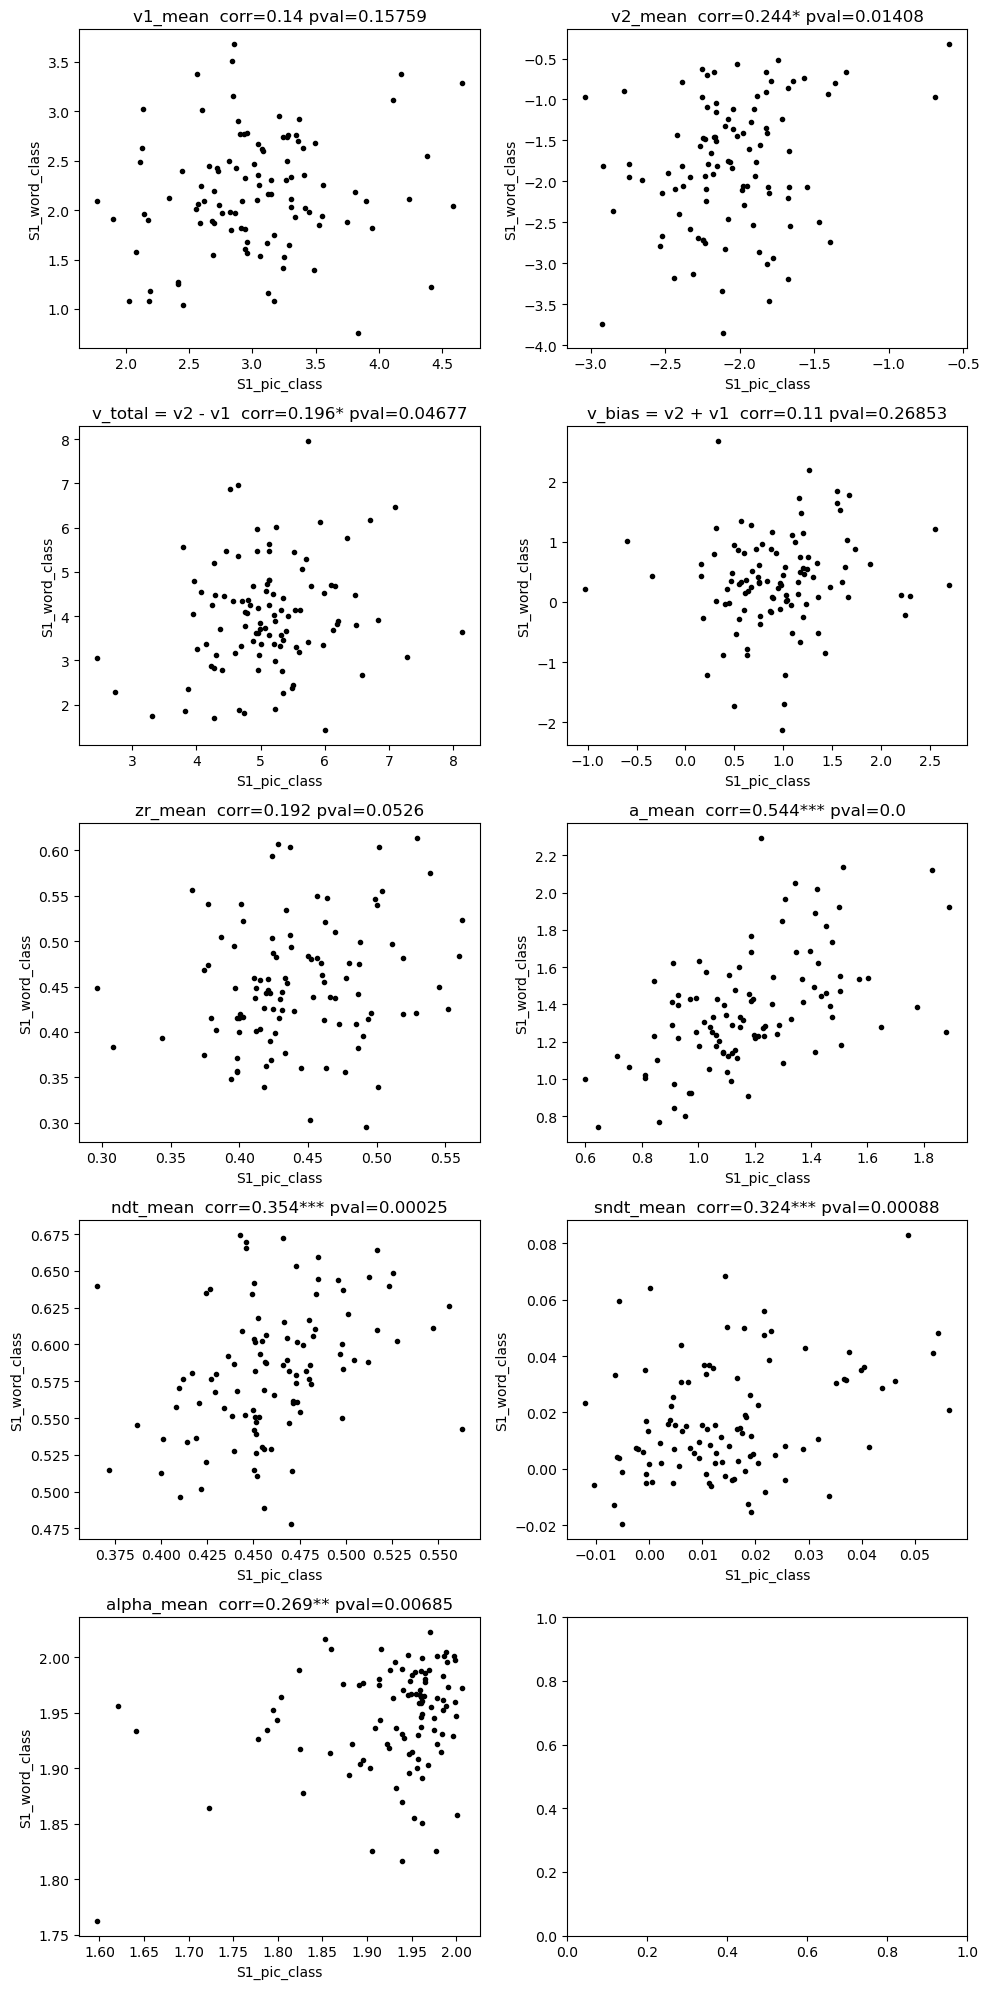

In [58]:
final_corr_frame = pd.DataFrame()
final_corr_frame['across_tasks']=['corr_word_pic_se_1']
from scipy.stats.stats import pearsonr

params_mean=['v1_mean','v2_mean','v_total = v2 - v1','v_bias = v2 + v1','zr_mean','a_mean','ndt_mean','sndt_mean','alpha_mean']
fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(10, 20))
axs = axs.flatten()
a=0 
all_outlier_ind = []
for param_task in params_mean :
    first_task=df_word_part_1[param_task]
    
    second_task = pictures_part_1 [param_task]
    data = {'subje_num':df_word_part_1['subje_num'],param_task+str('_word'):np.array(first_task),param_task:np.array(second_task)}
    corr_data = pd.DataFrame(data)
    df_x = corr_data[[param_task+str('_word'), param_task]]
    df_x['mahala'] = mahalanobis(x=df_x, data=corr_data[[param_task+str('_word'), param_task]])
    df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
    df_outliers=df_x.loc[df_x.p_value < 0.001]
    ind=df_outliers.index
    all_outlier_ind.append(ind)
    print(param_task)
    print(ind)
#drop the outliers with index     
    corr_without_outlier = corr_data.drop(ind)
    
    x = corr_without_outlier[param_task+str('_word')]
    y = corr_without_outlier[param_task]
    #corr =  np.corrcoef(x, y)[0,1]
    corrcoef_pval =pearsonr(x,y)
    corr = corrcoef_pval[0]
    corr =round(corr,3)
    pvalue=corrcoef_pval[1]
    pvalue =round(pvalue,5)
    #make significance by star ***
    if pvalue < 0.001 :
        corr = str(corr)+'***'
    elif pvalue < 0.01 :
        corr = str(corr)+'**'
    elif pvalue < 0.05 :
        corr = str(corr)+'*'
        
    print(param_task,corr,pvalue)
    #plt.plot(x, y, '.', color='black')
    #plt.show()
    axs[a].plot(x, y,'.',color='black')
    axs[a].set_title(param_task+'  corr='+str(corr)+' pval='+str(pvalue))
    axs[a].set_xlabel('S1_pic_class')
    axs[a].set_ylabel('S1_word_class')
    
    
    #ax.set_xlabel(param)
    #axs[a].set_xlabel(param)
    
    a+=1
    #plt.title('corr ='+str(corr))
    #plt.xlabel('Session_1_pic_class')
    #plt.ylabel('Session_2_pic_class')
    #plt.savefig("./{}.png".format(param))
    #plt.show()
    #f.savefig("./{}.png".format(param), dpi=600, bbox_inches='tight')
    fig.tight_layout()
    #f.savefig("./{}.png".format(param), dpi=600, bbox_inches='tight')

    final_corr_frame['corr_'+str(param_task)] = ['cor='+str(corr)]

#saving the results 
fig.savefig("./retest_word_acrossTask_word_pic_S1_corr_.png", dpi=600, bbox_inches='tight')

    #final_corr_frame[param_task] = [corr]


        
            

v1_mean_word v1_mean 0.14027301501432335


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


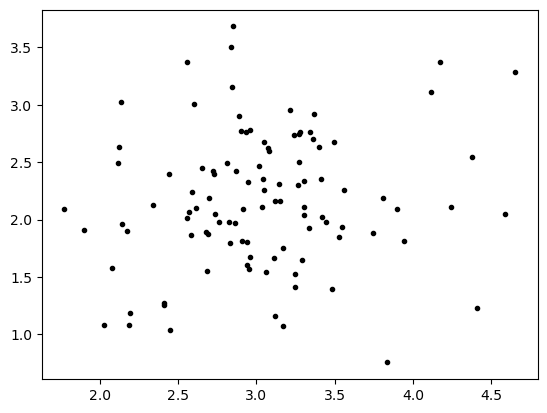

v1_mean_word v2_mean -0.1508892961587622


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


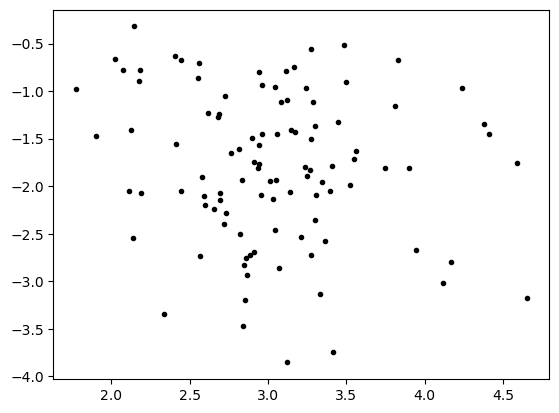

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v1_mean_word v_total = v2 - v1 0.177981959601507


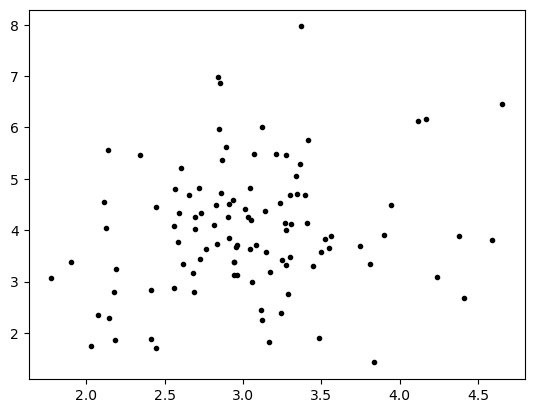

v1_mean_word v_bias = v2 + v1 -0.06898048644389222


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


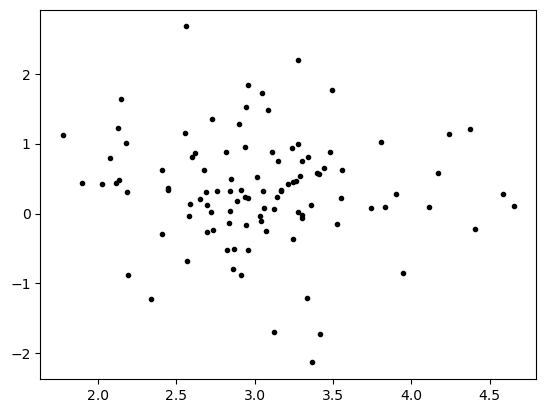

v1_mean_word zr_mean 0.08720646412790192


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


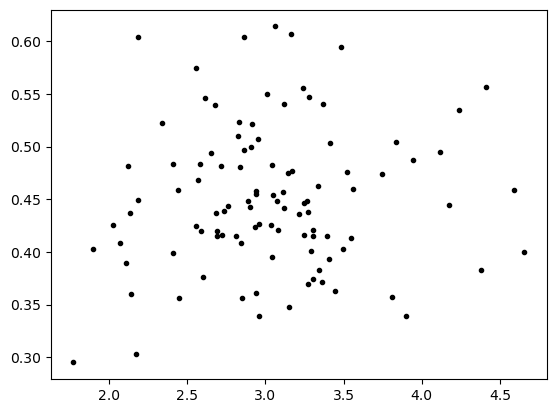

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v1_mean_word a_mean 0.03300465080660735


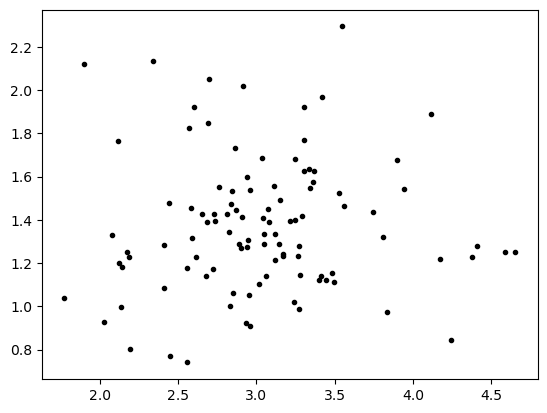

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v1_mean_word ndt_mean 0.03507050833268512


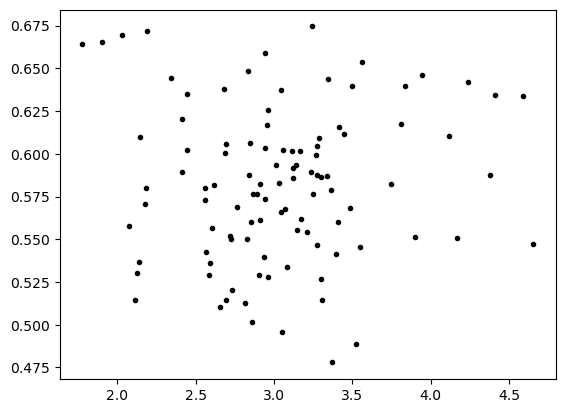

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v1_mean_word sndt_mean -0.1955154038610057


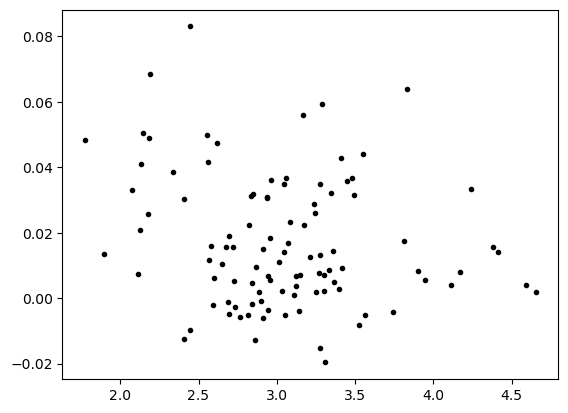

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v1_mean_word alpha_mean 0.08622207069020296


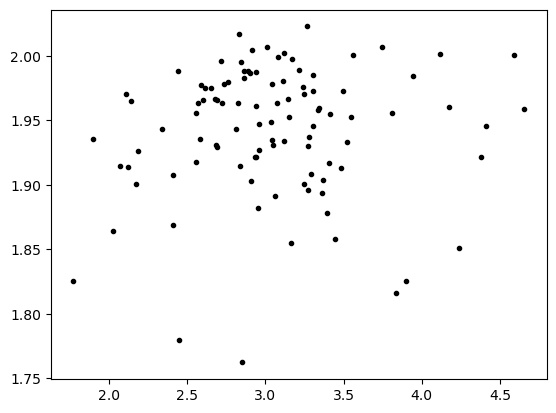

v2_mean_word v1_mean -0.036080774477277824


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


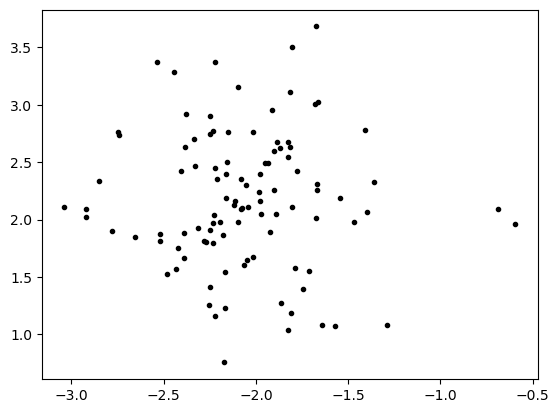

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v2_mean_word v2_mean 0.2436512461051992


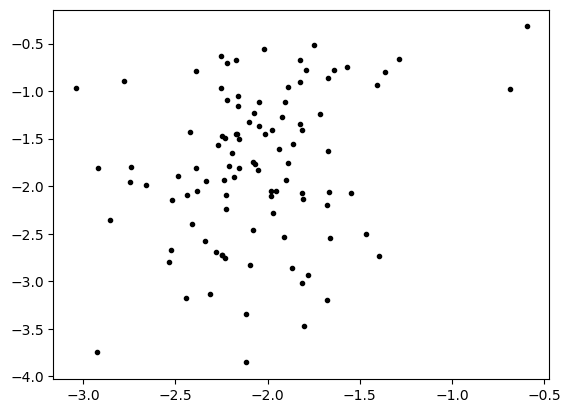

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v2_mean_word v_total = v2 - v1 -0.1921229131595117


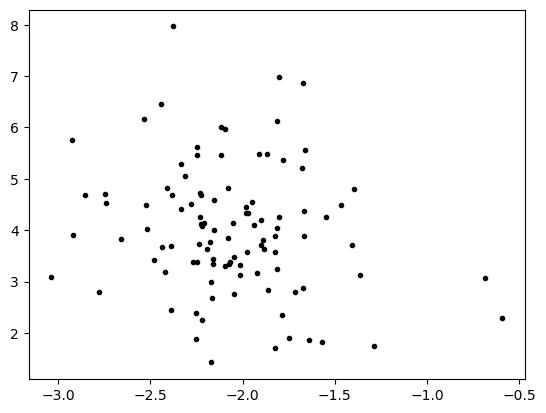

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v2_mean_word v_bias = v2 + v1 0.24812068057982506


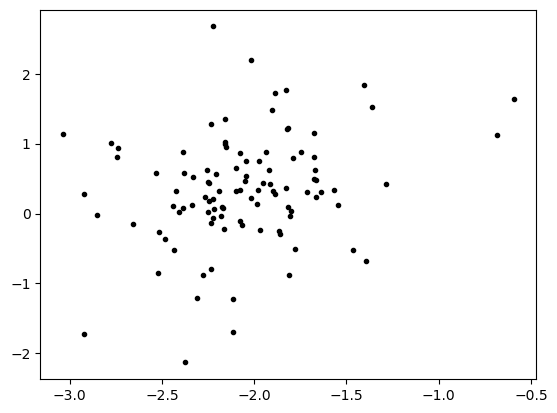

v2_mean_word zr_mean -0.12642913251309354


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


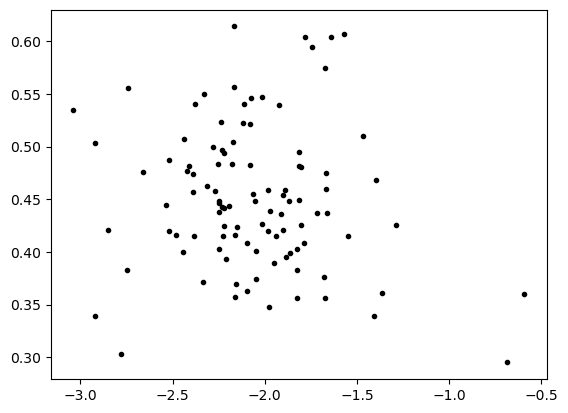

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v2_mean_word a_mean -0.16322464982263893


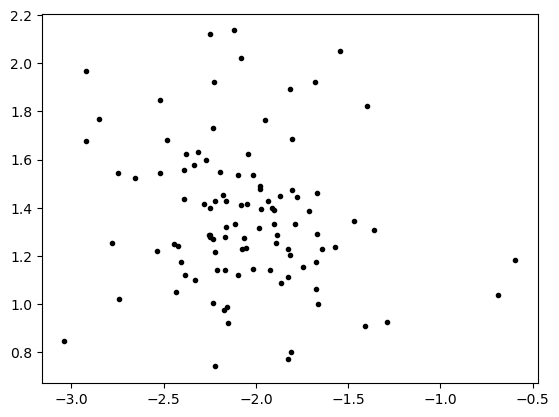

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v2_mean_word ndt_mean 0.15966274562318533


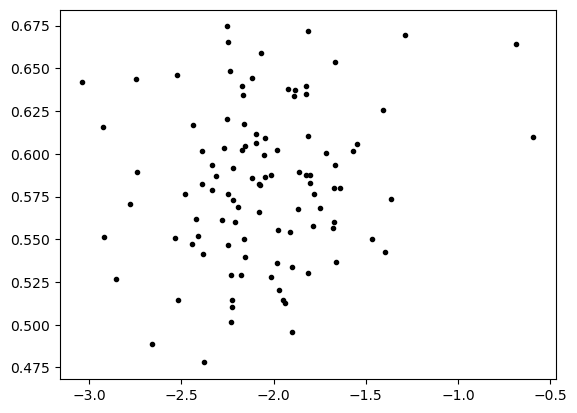

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v2_mean_word sndt_mean 0.24744945111172215


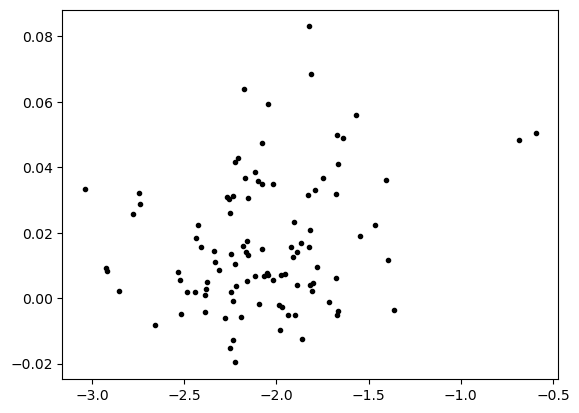

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v2_mean_word alpha_mean -0.1367551059046318


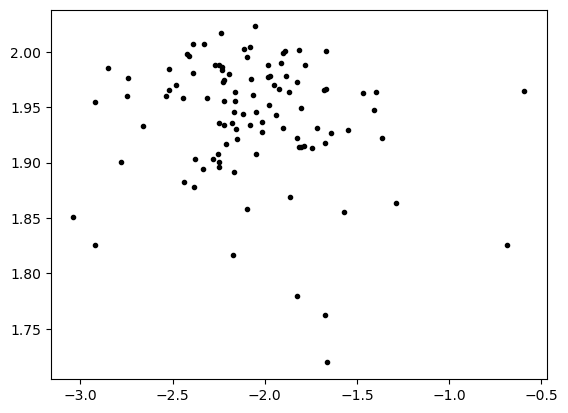

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_total = v2 - v1_word v1_mean 0.09733618739158137


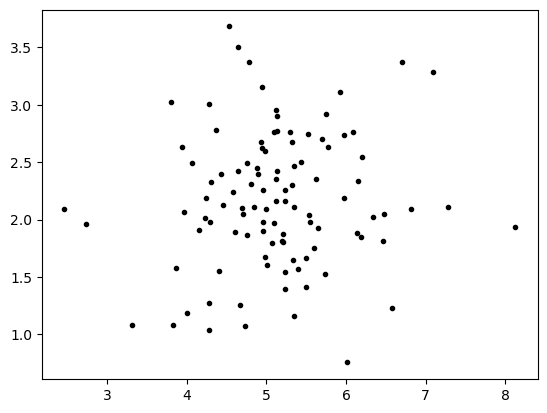

v_total = v2 - v1_word v2_mean -0.20713026244178145


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


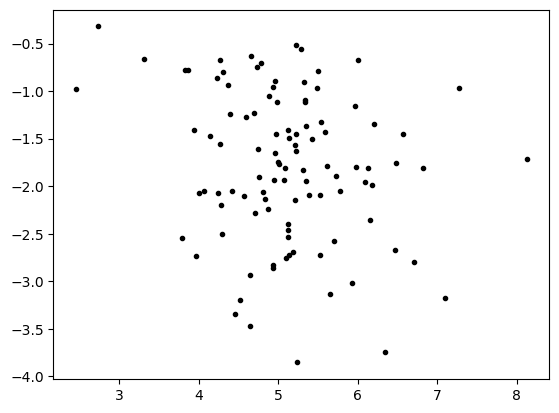

v_total = v2 - v1_word v_total = v2 - v1 0.1964060212782447


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


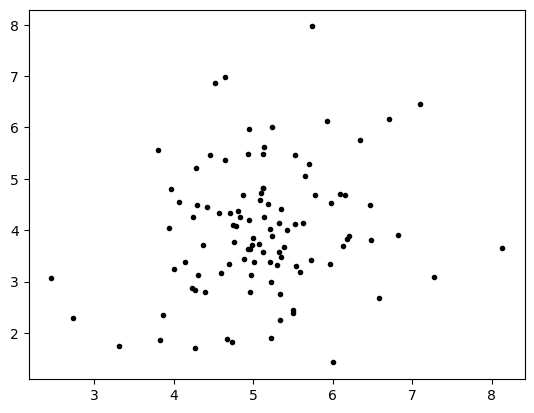

v_total = v2 - v1_word v_bias = v2 + v1 -0.16265779663784927


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


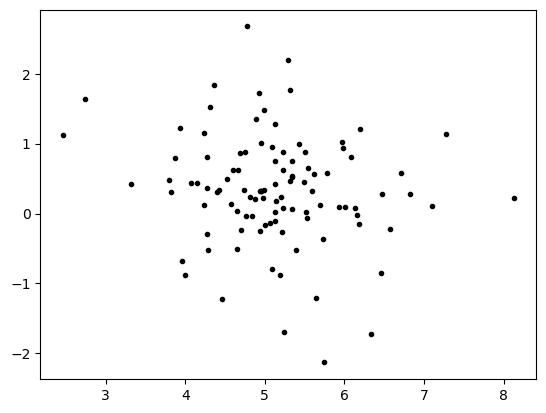

v_total = v2 - v1_word zr_mean 0.09928865070677387


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


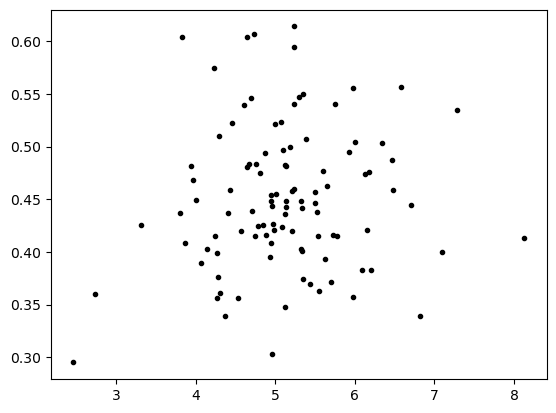

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_total = v2 - v1_word a_mean 0.08422533274981295


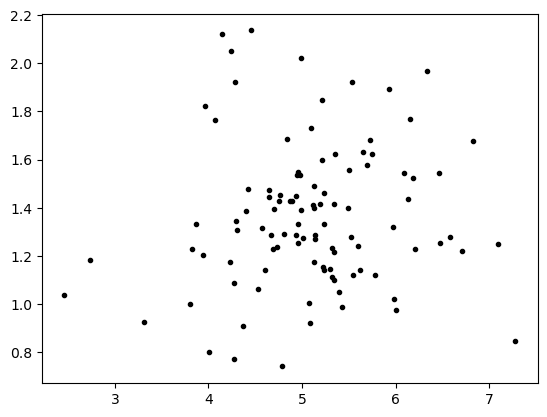

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_total = v2 - v1_word ndt_mean -0.07266304310359774


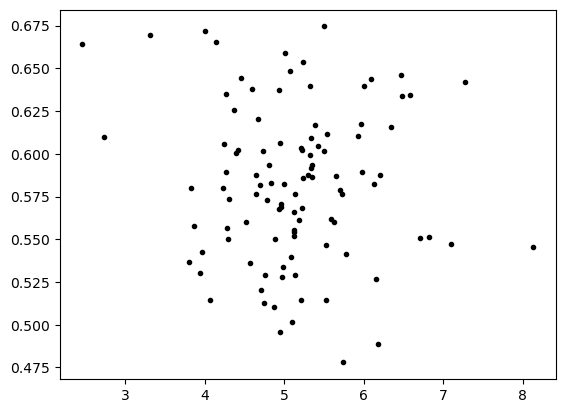

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_total = v2 - v1_word sndt_mean -0.267584189061801


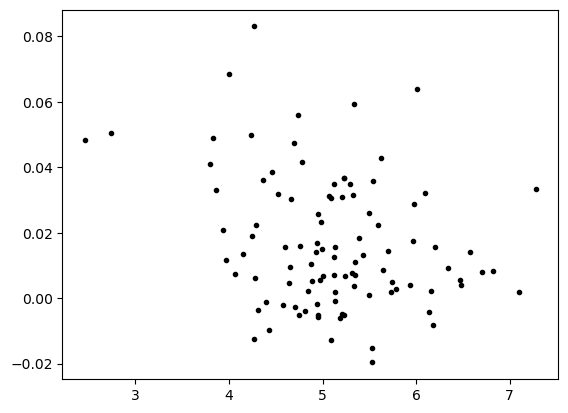

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_total = v2 - v1_word alpha_mean 0.11105242554639667


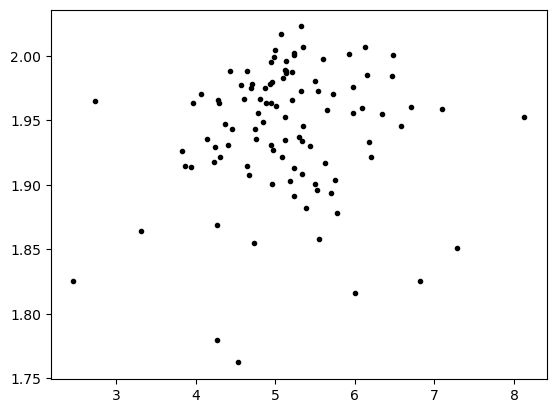

v_bias = v2 + v1_word v1_mean 0.13121169637318916


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


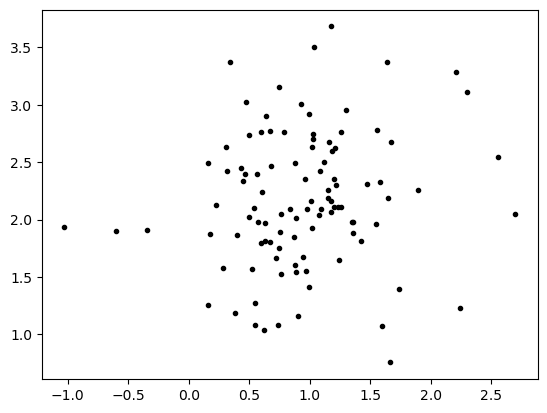

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_bias = v2 + v1_word v2_mean 0.014332339074245373


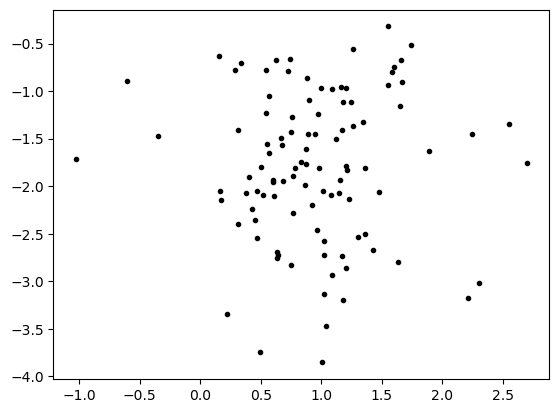

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_bias = v2 + v1_word v_total = v2 - v1 0.055624416674496246


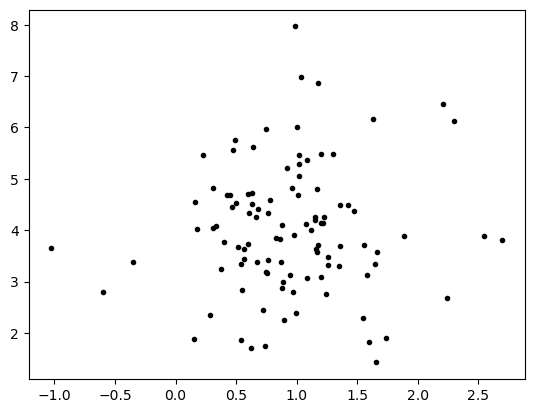

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_bias = v2 + v1_word v_bias = v2 + v1 0.11003337935251181


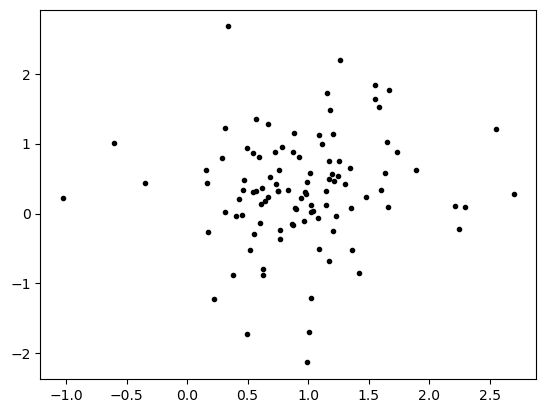

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_bias = v2 + v1_word zr_mean 0.022609099517201386


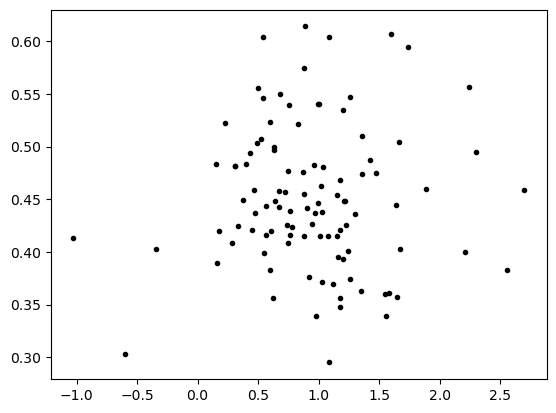

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_bias = v2 + v1_word a_mean -0.11306238700038175


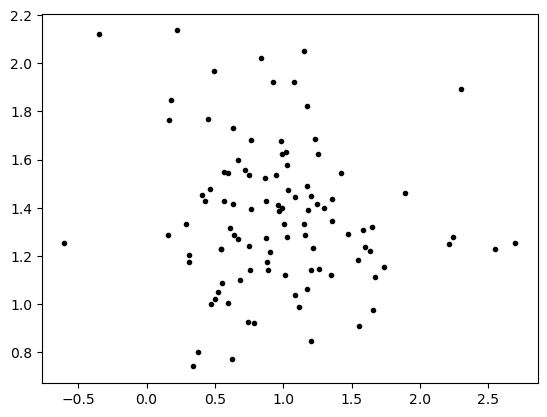

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_bias = v2 + v1_word ndt_mean 0.18030571792023098


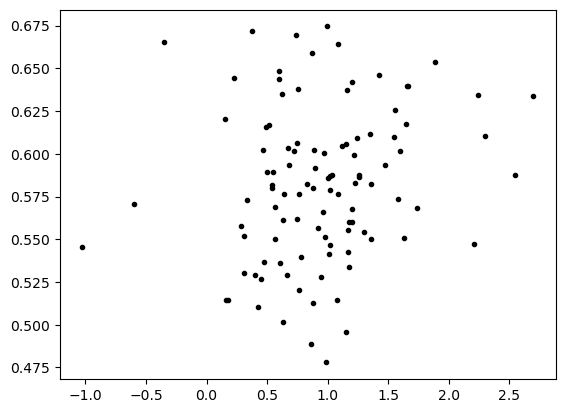

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_bias = v2 + v1_word sndt_mean -0.08158754545225382


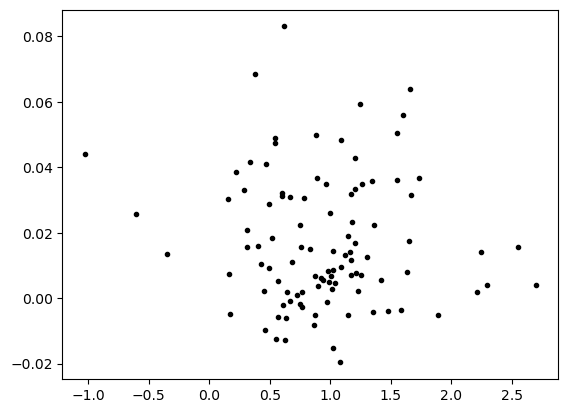

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_bias = v2 + v1_word alpha_mean 0.0350904309829005


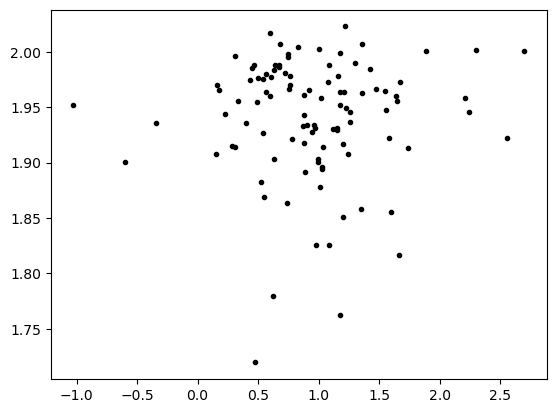

zr_mean_word v1_mean -0.24822466377498767


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


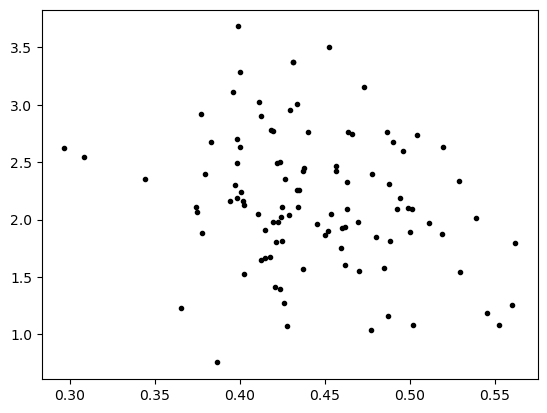

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


zr_mean_word v2_mean 0.16852509662884294


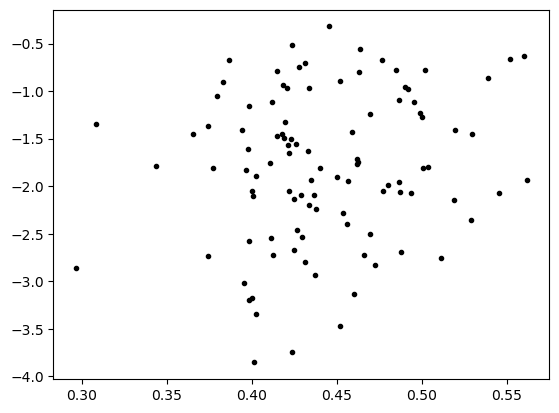

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


zr_mean_word v_total = v2 - v1 -0.25877261575833127


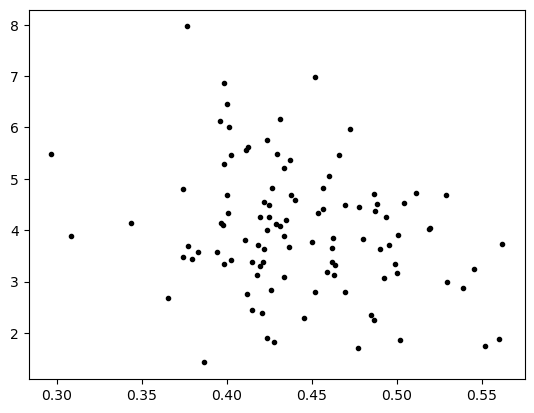

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


zr_mean_word v_bias = v2 + v1 0.03360524453852862


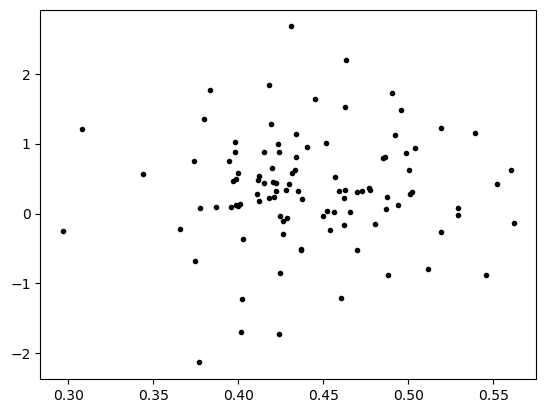

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


zr_mean_word zr_mean 0.19154113592509525


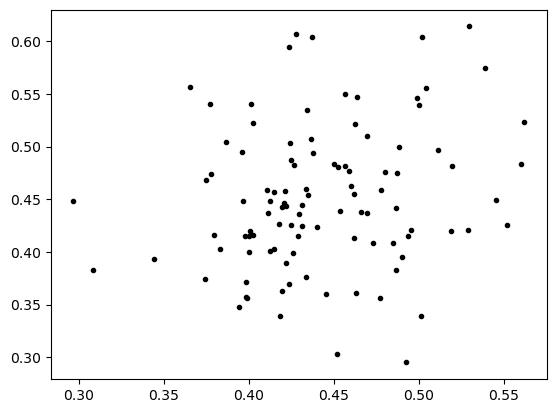

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


zr_mean_word a_mean -0.1120576556381081


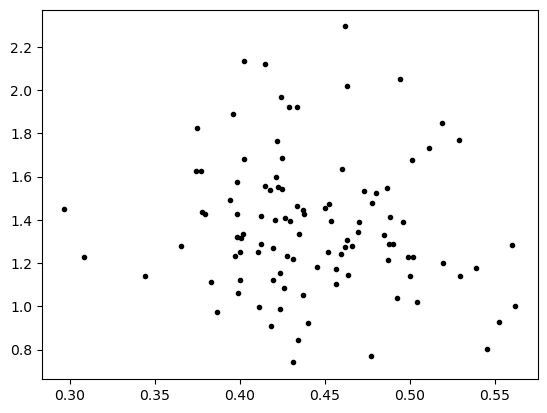

zr_mean_word ndt_mean 0.10480215605701287


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


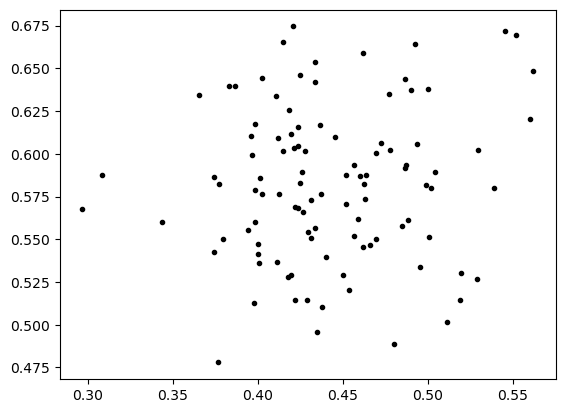

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


zr_mean_word sndt_mean 0.1416627725566269


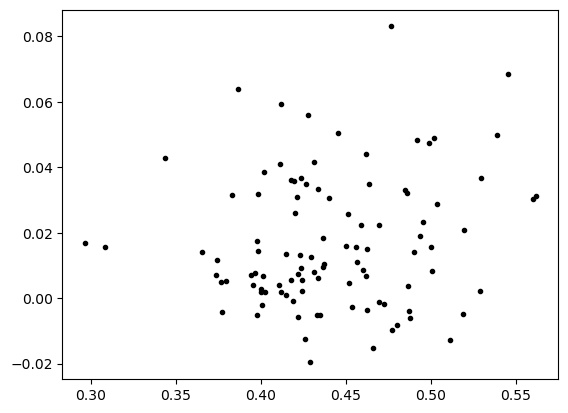

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


zr_mean_word alpha_mean -0.04002527138876636


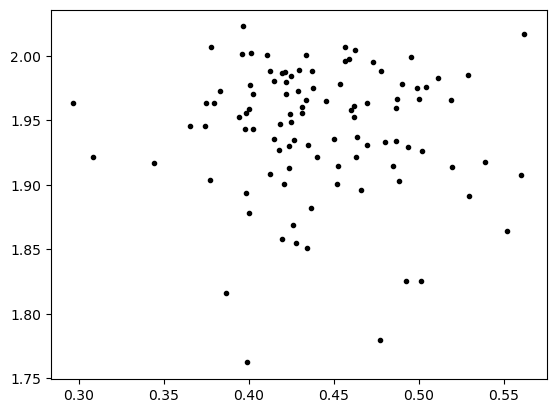

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


a_mean_word v1_mean -0.10864960947863306


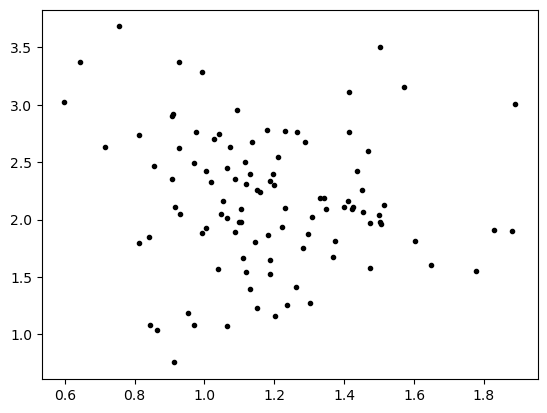

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


a_mean_word v2_mean 0.0009707009145981139


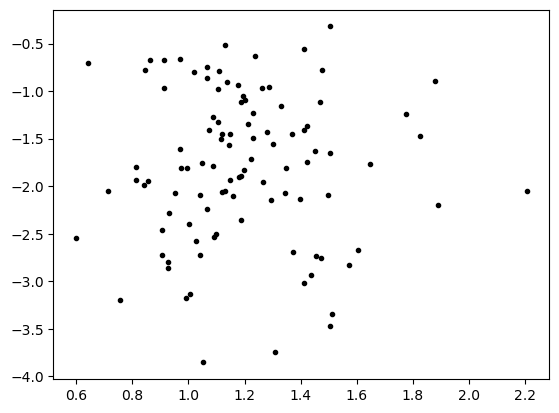

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


a_mean_word v_total = v2 - v1 -0.08834064625345506


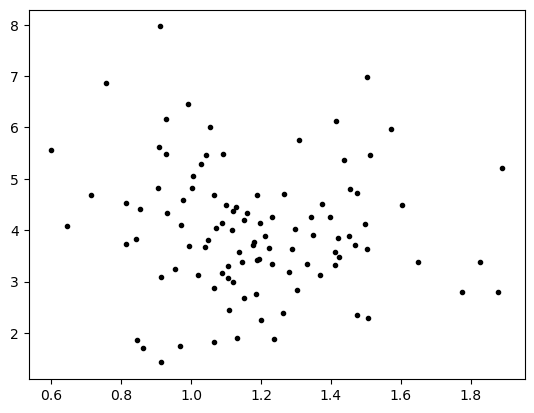

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


a_mean_word v_bias = v2 + v1 -0.01817108030905727


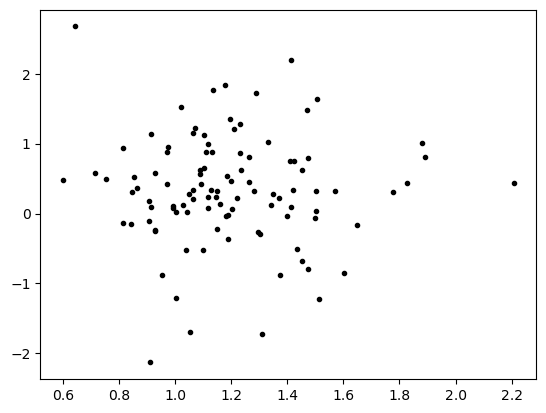

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


a_mean_word zr_mean -0.21036656537696266


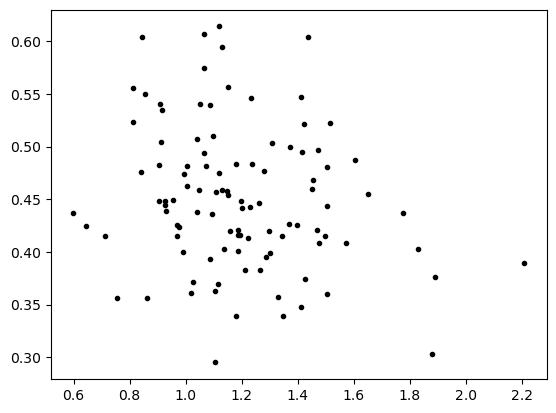

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


a_mean_word a_mean 0.5436984595649601


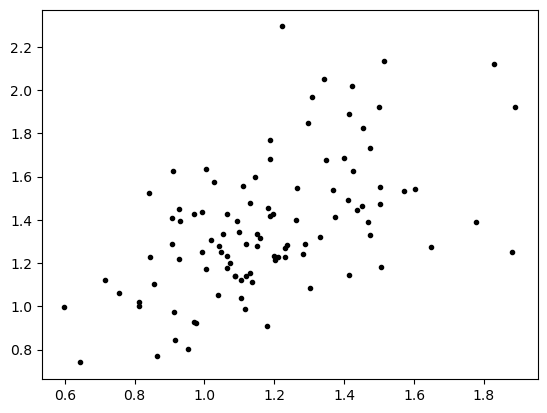

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


a_mean_word ndt_mean 0.12564316020738092


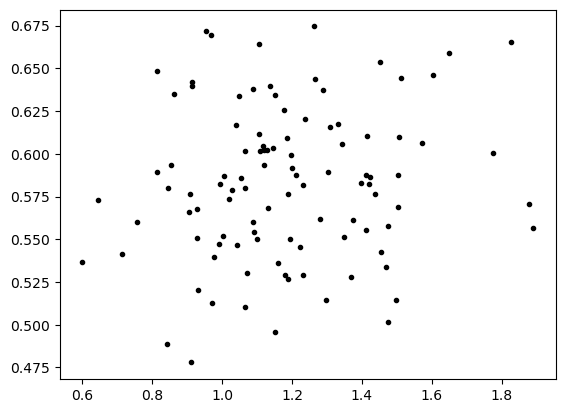

a_mean_word sndt_mean -0.2557182231798555


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


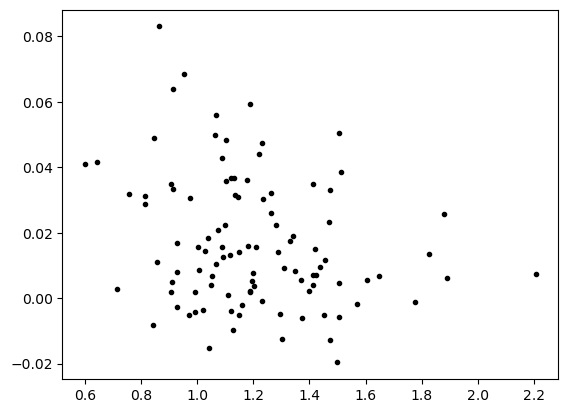

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


a_mean_word alpha_mean 0.21420548541609521


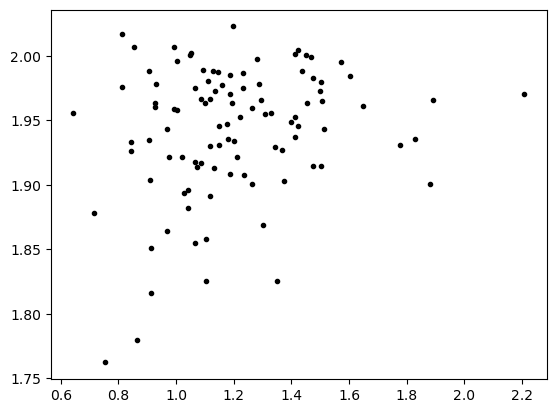

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ndt_mean_word v1_mean 0.14170567460733166


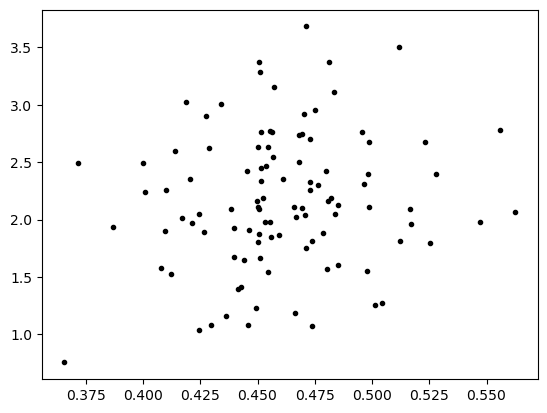

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ndt_mean_word v2_mean -0.07399176848150207


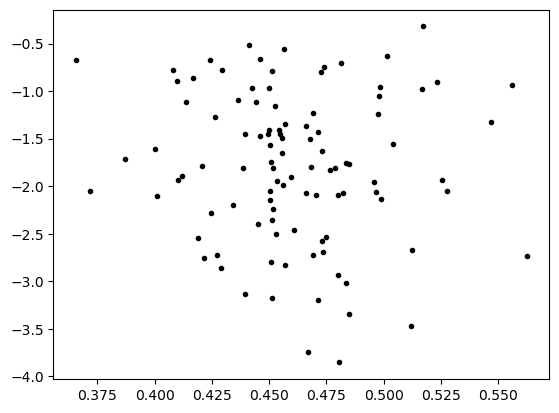

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ndt_mean_word v_total = v2 - v1 0.12173653738909732


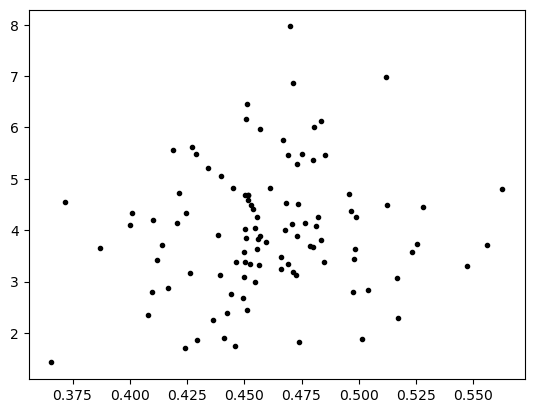

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ndt_mean_word v_bias = v2 + v1 0.02173988430569275


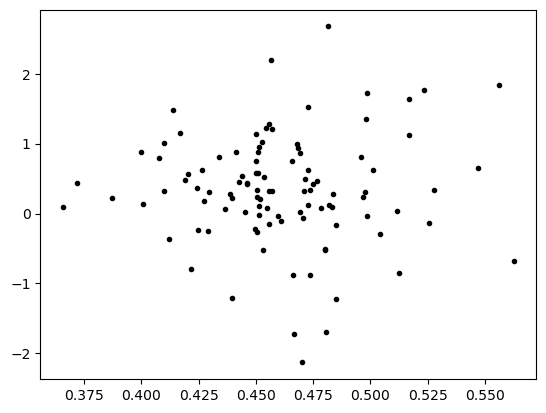

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ndt_mean_word zr_mean -0.03936142890662837


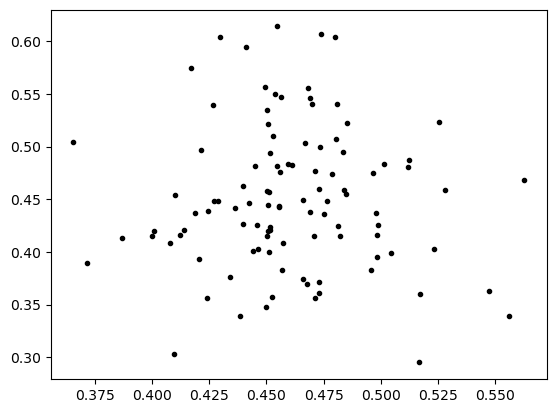

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ndt_mean_word a_mean -0.08122001705487214


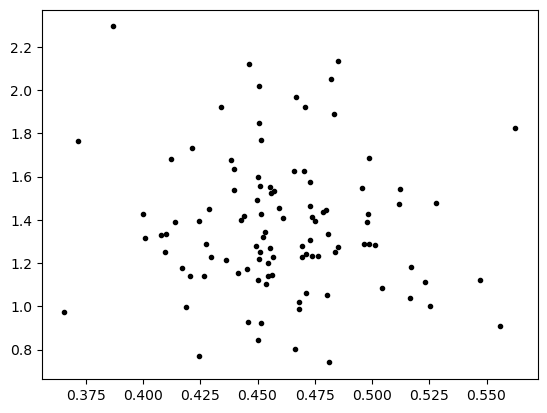

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ndt_mean_word ndt_mean 0.353862498725592


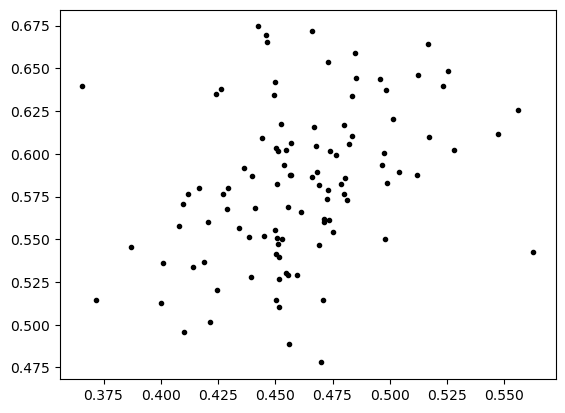

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ndt_mean_word sndt_mean -0.06599501966947736


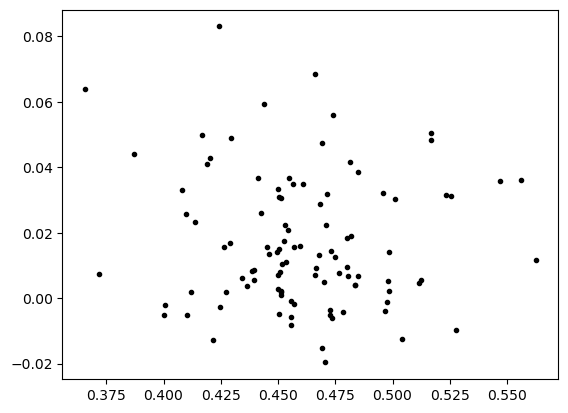

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ndt_mean_word alpha_mean 0.08656501953971825


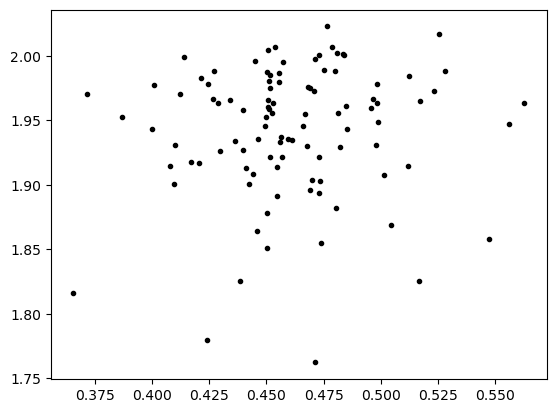

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


sndt_mean_word v1_mean 0.1376618466554344


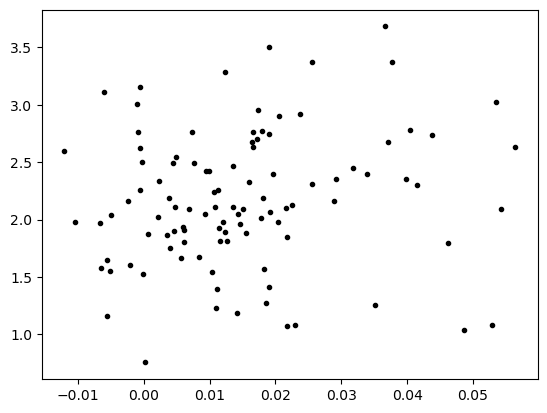

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


sndt_mean_word v2_mean 0.029382697432673258


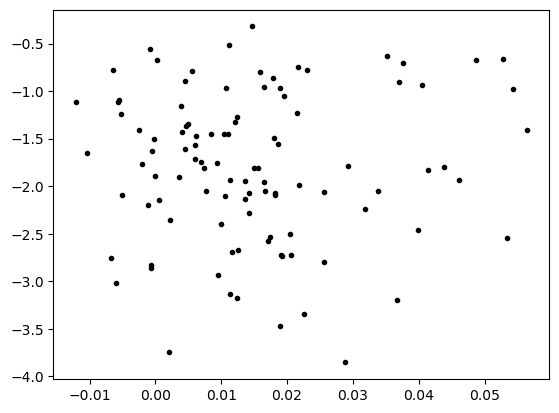

sndt_mean_word v_total = v2 - v1 0.06180687111289508


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


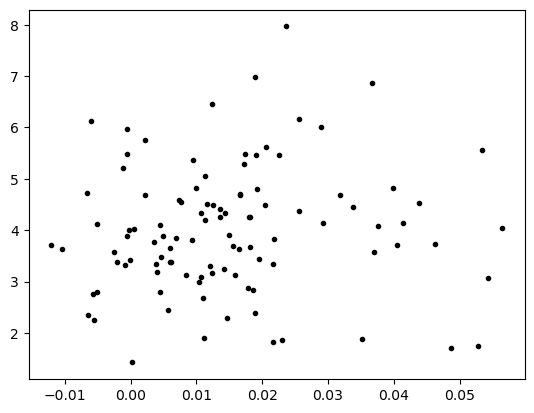

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


sndt_mean_word v_bias = v2 + v1 0.11001322502365278


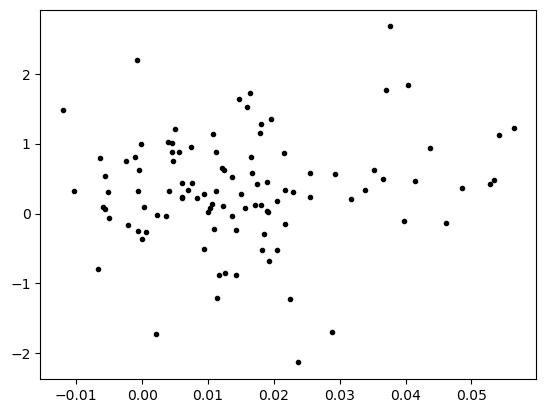

sndt_mean_word zr_mean 0.02919859311894605


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


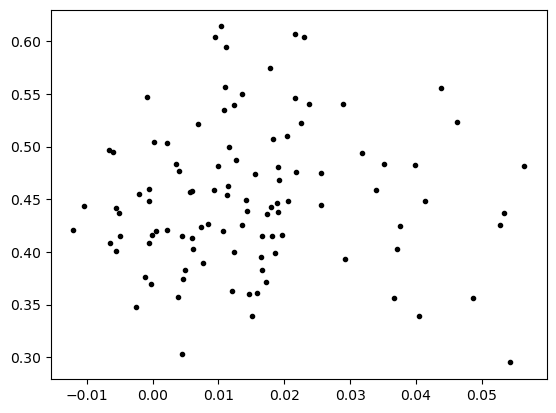

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


sndt_mean_word a_mean -0.4228142309292563


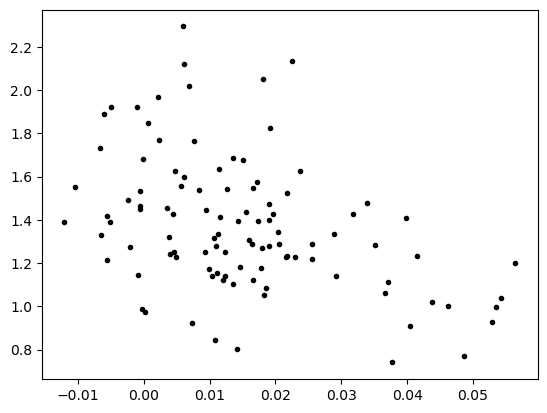

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


sndt_mean_word ndt_mean 0.14140421906960118


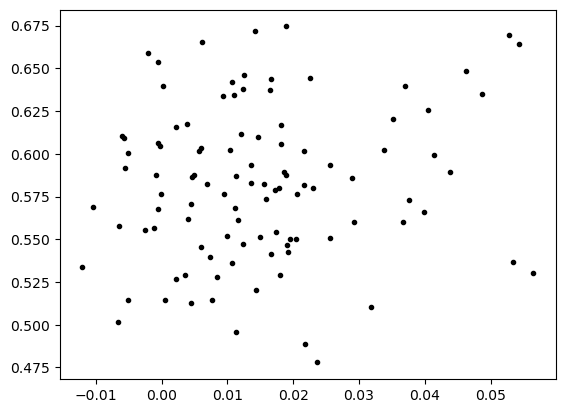

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


sndt_mean_word sndt_mean 0.32445527177530775


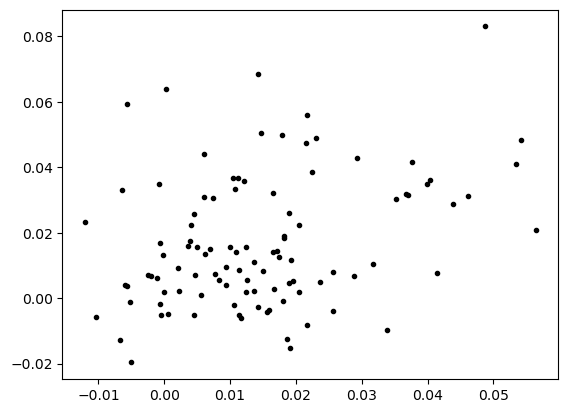

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


sndt_mean_word alpha_mean -0.24891631335766895


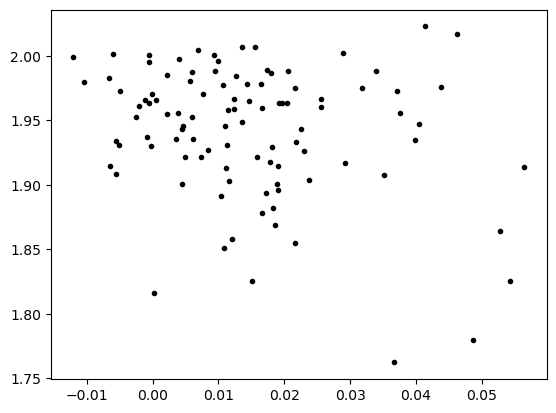

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


alpha_mean_word v1_mean 0.016573136306804424


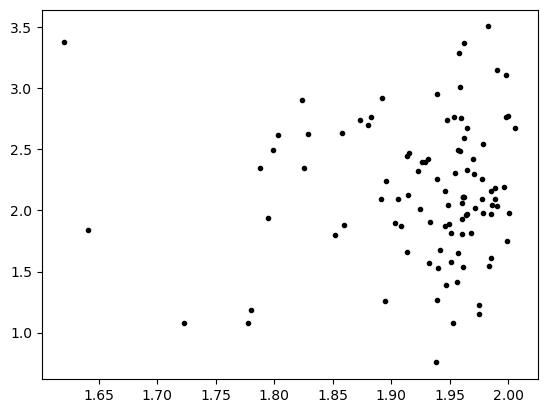

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


alpha_mean_word v2_mean -0.0049742571065269844


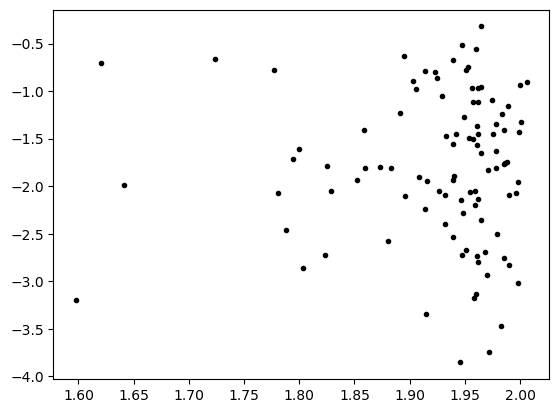

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


alpha_mean_word v_total = v2 - v1 0.05212932276950969


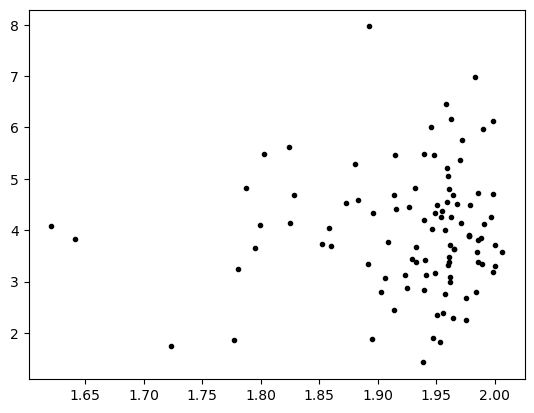

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


alpha_mean_word v_bias = v2 + v1 0.06540423733068512


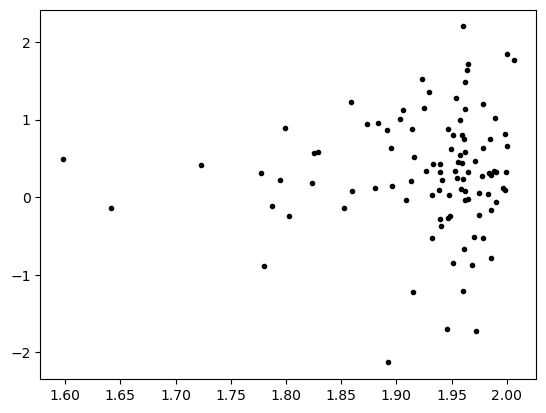

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


alpha_mean_word zr_mean -0.003116795568475609


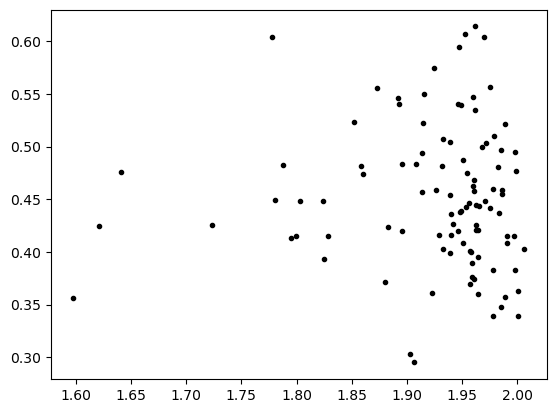

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


alpha_mean_word a_mean 0.3188564951074375


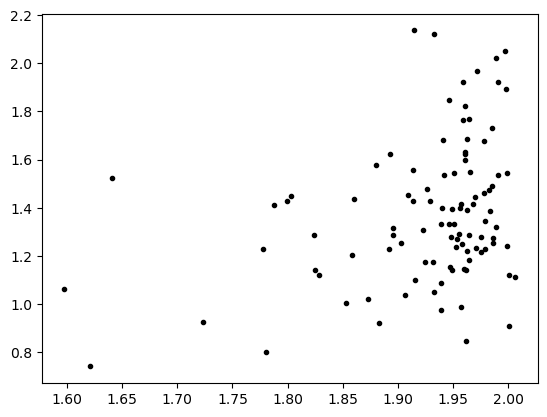

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


alpha_mean_word ndt_mean 0.15515219258824053


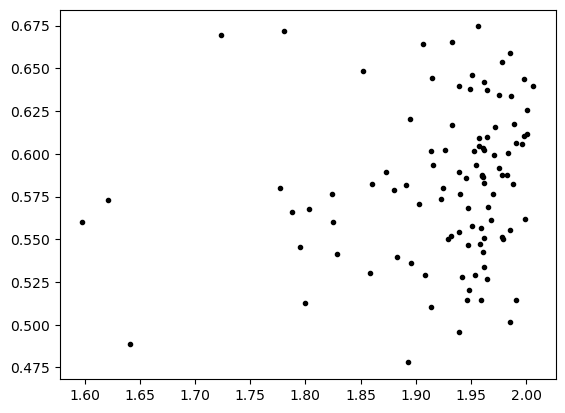

alpha_mean_word sndt_mean -0.22296211663099663


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


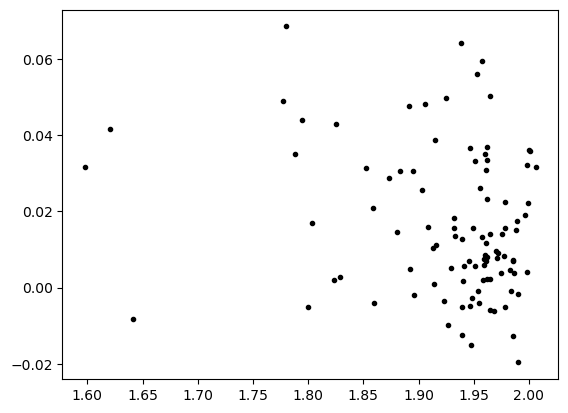

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


alpha_mean_word alpha_mean 0.26880564407061464


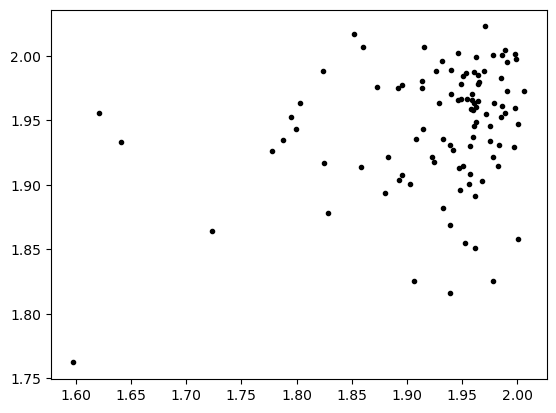

In [59]:
params_mean=['v1_mean','v2_mean','v_total = v2 - v1','v_bias = v2 + v1','zr_mean','a_mean','ndt_mean','sndt_mean','alpha_mean']
for param_task_1 in params_mean :
    first_task=df_word_part_1[param_task_1]
    
    for param_task_2 in params_mean : 
        second_task = pictures_part_1 [param_task_2]
        data = {'subje_num':df_word_part_1['subje_num'],param_task_1+str('_word'):np.array(first_task),param_task_2:np.array(second_task)}
        corr_data = pd.DataFrame(data)
        df_x = corr_data[[param_task_1+str('_word'), param_task_2]]
        df_x['mahala'] = mahalanobis(x=df_x, data=corr_data[[param_task_1+str('_word'), param_task_2]])
        df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
        df_outliers=df_x.loc[df_x.p_value < 0.001]
        ind=df_outliers.index
    #drop the outliers with index     
        corr_without_outlier = corr_data.drop(ind)
        x = corr_without_outlier[param_task_1+str('_word')]
        y = corr_without_outlier[param_task_2]
        corr =  np.corrcoef(x, y)[0,1]
        print(param_task_1+str('_word'),param_task_2,corr)
        plt.plot(x, y, '.', color='black')
        plt.show()

        #final_corr_frame['corr_'+str(param)] = [corr]

        
        
            

In [ ]:
final_corr_frame

/tmp/ipykernel_235534/1944777819.py:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v1_mean
Int64Index([], dtype='int64')
v1_mean Int64Index([], dtype='int64') 0.14 0.15759
v2_mean
Int64Index([14, 216], dtype='int64')
v2_mean Int64Index([14, 216], dtype='int64') 0.244* 0.01408
v_total = v2 - v1
Int64Index([], dtype='int64')
v_total = v2 - v1 Int64Index([], dtype='int64') 0.196* 0.04677


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

v_bias = v2 + v1
Int64Index([], dtype='int64')
v_bias = v2 + v1 Int64Index([], dtype='int64') 0.11 0.26853
zr_mean
Int64Index([], dtype='int64')
zr_mean Int64Index([], dtype='int64') 0.192 0.0526
a_mean
Int64Index([393], dtype='int64')
a_mean Int64Index([393], dtype='int64') 0.544*** 0.0


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

ndt_mean
Int64Index([], dtype='int64')
ndt_mean Int64Index([], dtype='int64') 0.354*** 0.00025
sndt_mean
Int64Index([356], dtype='int64')
sndt_mean Int64Index([356], dtype='int64') 0.324*** 0.00088
alpha_mean
Int64Index([243, 101, 186], dtype='int64')
alpha_mean Int64Index([243, 101, 186], dtype='int64') 0.269** 0.00685


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


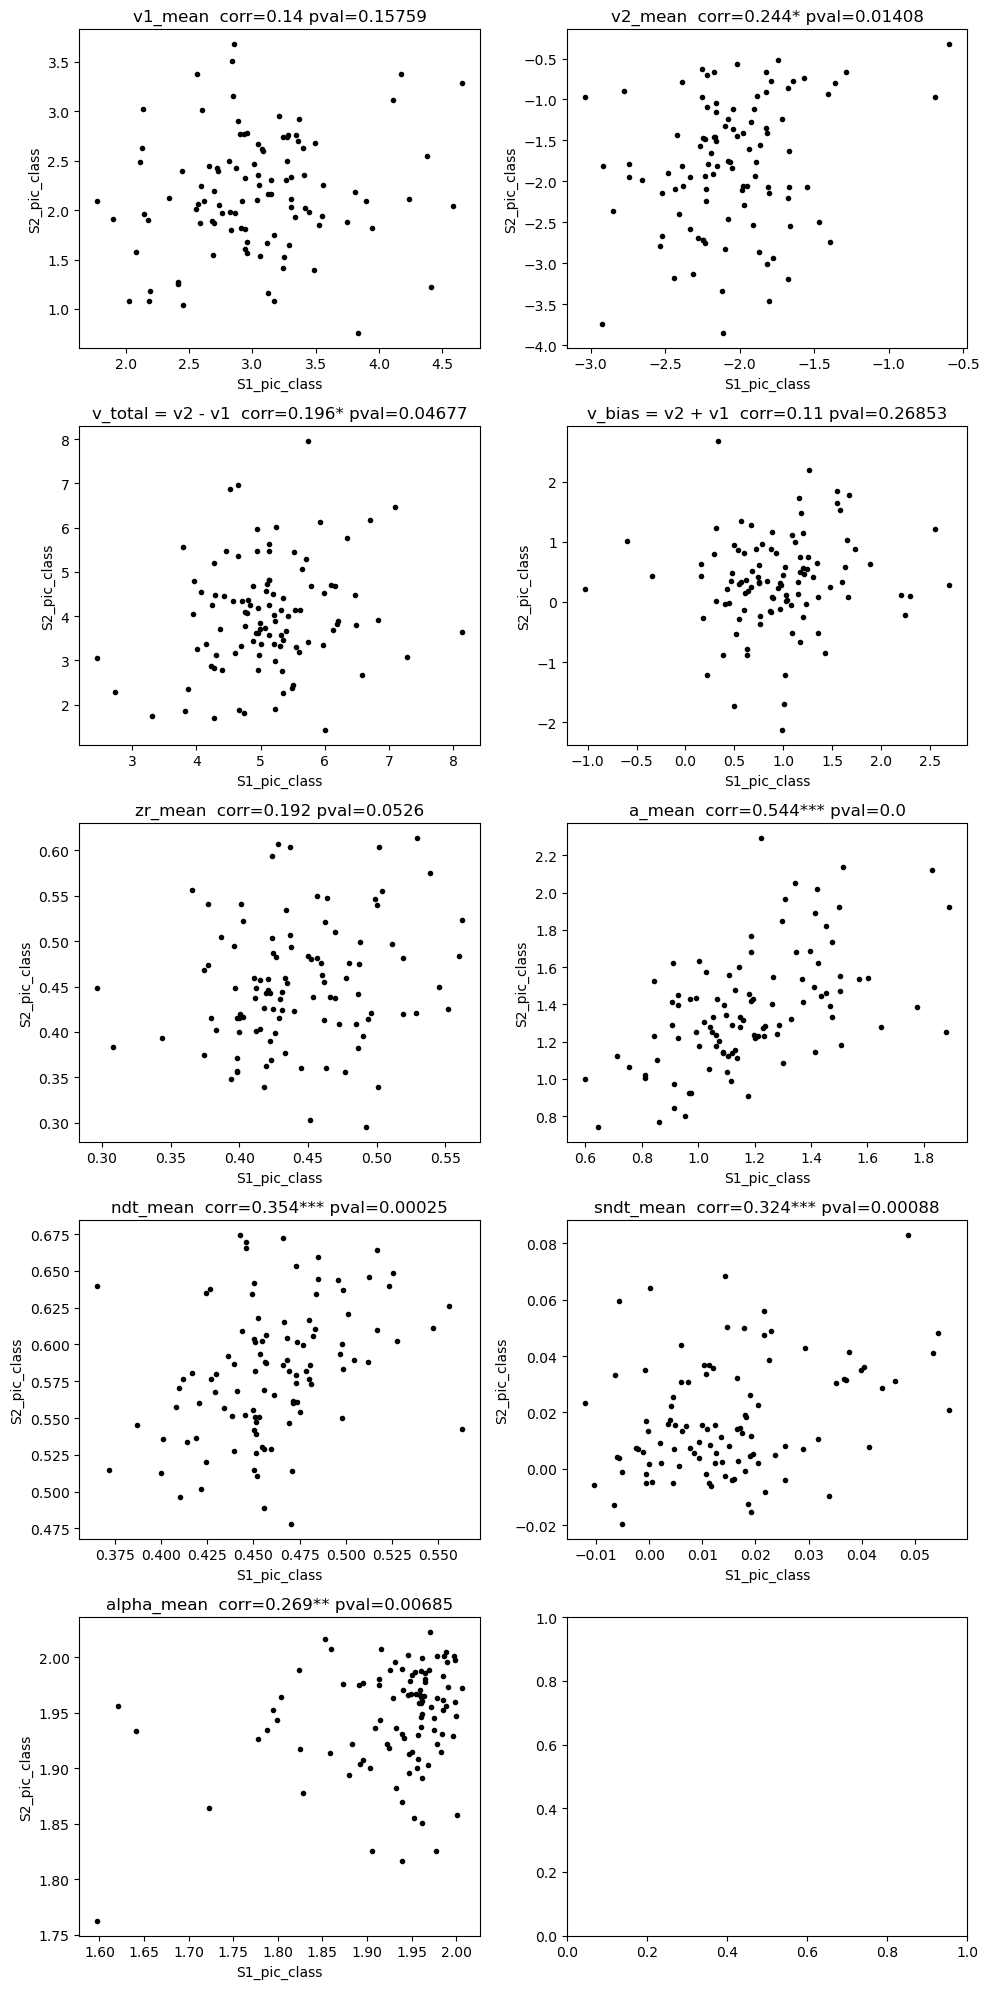

In [60]:
final_corr_frame = pd.DataFrame()
final_corr_frame['across_tasks']=['corr_word_pic_se_1']
from scipy.stats.stats import pearsonr

params_mean=['v1_mean','v2_mean','v_total = v2 - v1','v_bias = v2 + v1','zr_mean','a_mean','ndt_mean','sndt_mean','alpha_mean']
fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(10, 20))
axs = axs.flatten()
a=0 
all_outlier_ind = []
for param_task in params_mean :
    first_task=df_word_part_1[param_task]
    
    second_task = pictures_part_1 [param_task]
    data = {'subje_num':df_word_part_1['subje_num'],param_task+str('_word'):np.array(first_task),param_task:np.array(second_task)}
    corr_data = pd.DataFrame(data)
    df_x = corr_data[[param_task+str('_word'), param_task]]
    df_x['mahala'] = mahalanobis(x=df_x, data=corr_data[[param_task+str('_word'), param_task]])
    df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
    df_outliers=df_x.loc[df_x.p_value < 0.001]
    ind=df_outliers.index
    all_outlier_ind.append(ind)
    print(param_task)
    print(ind)
#drop the outliers with index     
    corr_without_outlier = corr_data.drop(ind)
    
    x = corr_without_outlier[param_task+str('_word')]
    y = corr_without_outlier[param_task]
    #corr =  np.corrcoef(x, y)[0,1]
    corrcoef_pval =pearsonr(x,y)
    corr = corrcoef_pval[0]
    corr =round(corr,3)
    pvalue=corrcoef_pval[1]
    pvalue =round(pvalue,5)
    if pvalue < 0.001 :
        corr = str(corr)+'***'
    elif pvalue < 0.01 :
        corr = str(corr)+'**'
    elif pvalue < 0.05 :
        corr = str(corr)+'*'
  
    
    print(param_task,ind,corr,pvalue)
    #plt.plot(x, y, '.', color='black')
    #plt.show()
    axs[a].plot(x, y,'.',color='black')
    axs[a].set_title(param_task+'  corr='+str(corr)+' pval='+str(pvalue))
    axs[a].set_xlabel('S1_pic_class')
    axs[a].set_ylabel('S2_pic_class')
    
    
    #ax.set_xlabel(param)
    #axs[a].set_xlabel(param)
    
    a+=1
    #plt.title('corr ='+str(corr))
    #plt.xlabel('Session_1_pic_class')
    #plt.ylabel('Session_2_pic_class')
    #plt.savefig("./{}.png".format(param))
    #plt.show()
    #f.savefig("./{}.png".format(param), dpi=600, bbox_inches='tight')
    fig.tight_layout()
    #f.savefig("./{}.png".format(param), dpi=600, bbox_inches='tight')

    final_corr_frame['corr_'+str(param_task)] = ['cor='+str(corr)]

#saving the results 
#fig.savefig("./Study1_retest_word_acrossTask_word_pic_corr_.png", dpi=600, bbox_inches='tight')

    #final_corr_frame[param_task] = [corr]


        
            

In [31]:
final_corr_frame.to_excel("corr_across_task_s1_w_p.xlsx")

final_corr_frame

,across_tasks,corr_v1_mean,corr_v2_mean,corr_v_total = v2 - v1,corr_v_bias = v2 + v1,corr_zr_mean,corr_a_mean,corr_ndt_mean,corr_sndt_mean,corr_alpha_mean
0,corr_word_pic_se_1,cor=0.247*,cor=0.254**,cor=0.219*,cor=0.11,cor=0.192,cor=0.57***,cor=0.553***,cor=0.324***,cor=0.303**


# Session 1

In [73]:
#consider one task in two session 
df_word_part_1 =df[df['Experiment'].str.contains('class_words_part_1.')]
pictures_part_1 = df[df['Experiment'].str.contains('class_pictures_part_1.')]

import re

# Given String
s = "001_class_pictures_part_1.dat"

# Performing Split
res_1 = re.split('_', s)
res_2 = re.split('a', s, 1)

# Print Results
print(res_1)
print(res_2)


#pictures_part_1['subje_num']= 'NaN'
pictures_part_1.insert(0, "subje_num", 'NaN', True)
df_word_part_1.insert(0, "subje_num", 'NaN', True)


for ind in pictures_part_1.index :
    name =pictures_part_1['Experiment'][ind]
    subj_num = re.split('_', name)[0]
    pictures_part_1['subje_num'][ind]= subj_num
    
for ind in df_word_part_1.index :
    name =df_word_part_1['Experiment'][ind]
    subj_num = re.split('_', name)[0]
    df_word_part_1['subje_num'][ind]= subj_num
    
    
pictures_part_1=pictures_part_1.sort_values('subje_num')
pictures_part_1['subje_num']

df_word_part_1=df_word_part_1.sort_values('subje_num')
df_word_part_1=df_word_part_1[df_word_part_1['subje_num'].isin(pictures_part_1['subje_num'])]
    
pictures_part_1=pictures_part_1[pictures_part_1['subje_num'].isin(df_word_part_1['subje_num'])]


['001', 'class', 'pictures', 'part', '1.dat']
['001_cl', 'ss_pictures_part_1.dat']


/tmp/ipykernel_235534/1511182890.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pictures_part_1['subje_num'][ind]= subj_num
/tmp/ipykernel_235534/1511182890.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word_part_1['subje_num'][ind]= subj_num


/tmp/ipykernel_235534/3552200269.py:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v1_mean Int64Index([], dtype='int64') 0.14 0.15759
v2_mean Int64Index([14, 216], dtype='int64') 0.244* 0.01408
v_total = v2 - v1 Int64Index([], dtype='int64') 0.196* 0.04677


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

v_bias = v2 + v1 Int64Index([], dtype='int64') 0.11 0.26853
zr_mean Int64Index([], dtype='int64') 0.192 0.0526
a_mean Int64Index([393], dtype='int64') 0.544*** 0.0


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

ndt_mean Int64Index([], dtype='int64') 0.354*** 0.00025
sndt_mean Int64Index([356], dtype='int64') 0.324*** 0.00088
alpha_mean Int64Index([243, 101, 186], dtype='int64') 0.269** 0.00685


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,across_tasks,corr_v1_mean,corr_v2_mean,corr_v_total = v2 - v1,corr_v_bias = v2 + v1,corr_zr_mean,corr_a_mean,corr_ndt_mean,corr_sndt_mean,corr_alpha_mean
0,corr_word_pic_se_1,cor=0.14,cor=0.244*,cor=0.196*,cor=0.11,cor=0.192,cor=0.544***,cor=0.354***,cor=0.324***,cor=0.269**


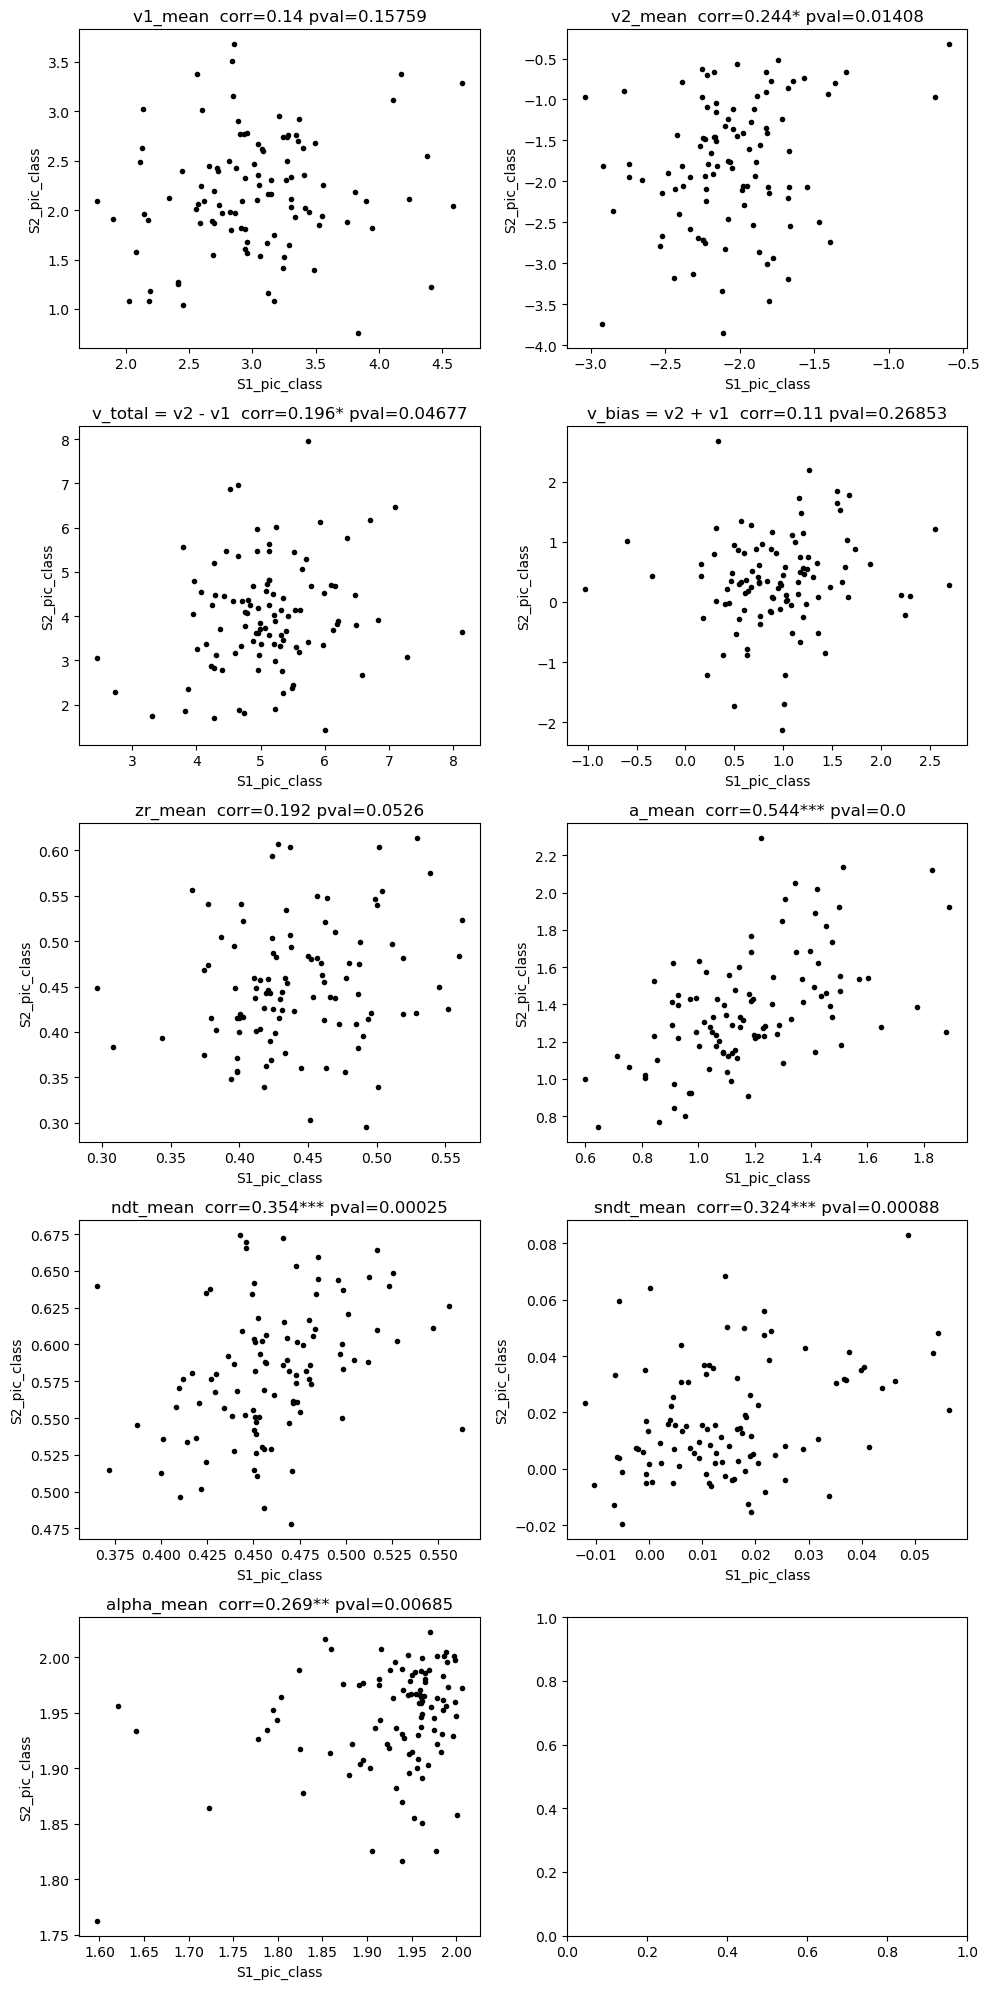

In [74]:
final_corr_frame_ses_1 = pd.DataFrame()
final_corr_frame_ses_1['across_tasks']=['corr_word_pic_se_1']
from scipy.stats.stats import pearsonr

params_mean=['v1_mean','v2_mean','v_total = v2 - v1','v_bias = v2 + v1','zr_mean','a_mean','ndt_mean','sndt_mean','alpha_mean']

fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(10, 20))
axs = axs.flatten()
a=0

for param_task in params_mean :
    first_task=df_word_part_1[param_task]
    
    second_task = pictures_part_1 [param_task]
    data = {'subje_num':df_word_part_1['subje_num'],param_task+str('_word'):np.array(first_task),param_task:np.array(second_task)}
    corr_data = pd.DataFrame(data)
    df_x = corr_data[[param_task+str('_word'), param_task]]
    df_x['mahala'] = mahalanobis(x=df_x, data=corr_data[[param_task+str('_word'), param_task]])
    df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
    df_outliers=df_x.loc[df_x.p_value < 0.001]
    ind=df_outliers.index
#drop the outliers with index     
    corr_without_outlier = corr_data.drop(ind)
    x = corr_without_outlier[param_task+str('_word')]
    y = corr_without_outlier[param_task]
    #corr =  np.corrcoef(x, y)[0,1]
    corrcoef_pval =pearsonr(x,y)
    corr = corrcoef_pval[0]
    corr =round(corr,3)
    pvalue=corrcoef_pval[1]
    pvalue =round(pvalue,5)
    if pvalue < 0.001 :
        corr = str(corr)+'***'
    elif pvalue < 0.01 :
        corr = str(corr)+'**'
    elif pvalue < 0.05 :
        corr = str(corr)+'*'
  
    print(param_task,ind,corr,pvalue)
    #plt.plot(x, y, '.', color='black')
    #plt.show()
    axs[a].plot(x, y,'.',color='black')
    axs[a].set_title(param_task+'  corr='+str(corr)+' pval='+str(pvalue))
    axs[a].set_xlabel('S1_pic_class')
    axs[a].set_ylabel('S2_pic_class')
    
    
    #ax.set_xlabel(param)
    #axs[a].set_xlabel(param)
    
    a+=1
    #plt.title('corr ='+str(corr))
    #plt.xlabel('Session_1_pic_class')
    #plt.ylabel('Session_2_pic_class')
    #plt.savefig("./{}.png".format(param))
    #plt.show()
    #f.savefig("./{}.png".format(param), dpi=600, bbox_inches='tight')
    fig.tight_layout()
    #f.savefig("./{}.png".format(param), dpi=600, bbox_inches='tight')

    final_corr_frame_ses_1['corr_'+str(param_task)] = ['cor='+str(corr)]

#saving the results 
fig.savefig("./Study1_retest_session1_word_acrossTask_word_pic_corr_.png", dpi=600, bbox_inches='tight')
final_corr_frame_ses_1.to_excel("restest_corr_across_task_s1_w_pic.xlsx")

final_corr_frame_ses_1
    #plt.plot(x, y, '.', color='black')
    #plt.show()

    #final_corr_frame_ses_1[param_task] = [corr]


        
            

# sessin 2 

In [61]:
#consider one task in two session 
df_word_part_1 = df[df['Experiment'].str.contains('class_words_part_2.')]
pictures_part_1 = df[df['Experiment'].str.contains('class_pictures_part_2.')]
pictures_part_1

import re

# Given String
s = "001_class_pictures_part_2.dat"

# Performing Split
res_1 = re.split('_', s)
res_2 = re.split('a', s, 1)

# Print Results
print(res_1)
print(res_2)


#pictures_part_1['subje_num']= 'NaN'
pictures_part_1.insert(0, "subje_num", 'NaN', True)
df_word_part_1.insert(0, "subje_num", 'NaN', True)


for ind in pictures_part_1.index :
    name =pictures_part_1['Experiment'][ind]
    subj_num = re.split('_', name)[0]
    pictures_part_1['subje_num'][ind]= subj_num
    
for ind in df_word_part_1.index :
    name =df_word_part_1['Experiment'][ind]
    subj_num = re.split('_', name)[0]
    df_word_part_1['subje_num'][ind]= subj_num
    
    
pictures_part_1=pictures_part_1.sort_values('subje_num')
pictures_part_1['subje_num']

df_word_part_1=df_word_part_1.sort_values('subje_num')
df_word_part_1=df_word_part_1[df_word_part_1['subje_num'].isin(pictures_part_1['subje_num'])]
    


['001', 'class', 'pictures', 'part', '2.dat']
['001_cl', 'ss_pictures_part_2.dat']


/tmp/ipykernel_235534/1753834372.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pictures_part_1['subje_num'][ind]= subj_num
/tmp/ipykernel_235534/1753834372.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word_part_1['subje_num'][ind]= subj_num


/tmp/ipykernel_235534/1454697033.py:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v1_mean Int64Index([], dtype='int64') 0.373*** 0.0001
v2_mean Int64Index([], dtype='int64') 0.246* 0.01233


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

v_total = v2 - v1 Int64Index([], dtype='int64') 0.347*** 0.00033
v_bias = v2 + v1 Int64Index([], dtype='int64') 0.149 0.13181
zr_mean Int64Index([59], dtype='int64') 0.26** 0.00841


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

a_mean Int64Index([102], dtype='int64') 0.519*** 0.0
ndt_mean Int64Index([169], dtype='int64') 0.527*** 0.0
sndt_mean Int64Index([102, 59], dtype='int64') 0.177 0.07657


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


alpha_mean Int64Index([169], dtype='int64') 0.475*** 0.0


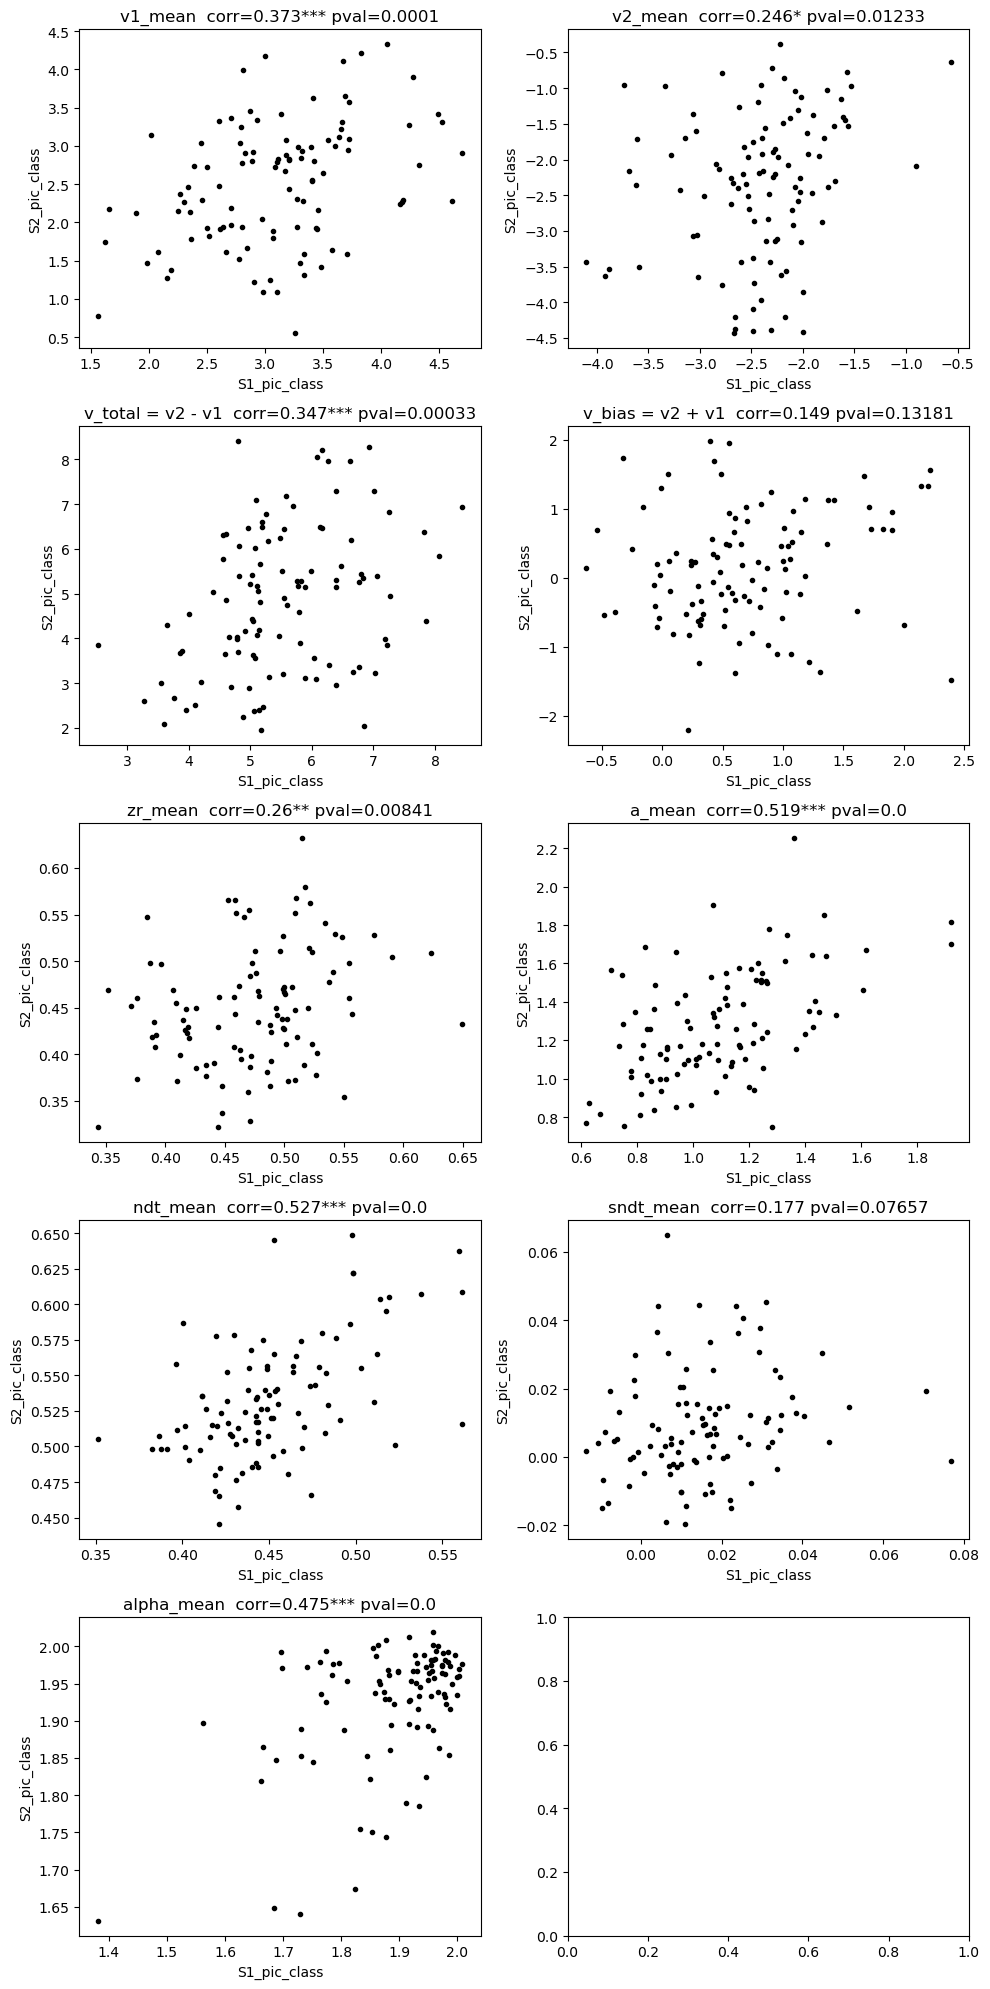

In [62]:
final_corr_frame_ses_2 = pd.DataFrame()
final_corr_frame_ses_2['across_tasks']=['corr_word_pic_se_2']
from scipy.stats.stats import pearsonr

params_mean=['v1_mean','v2_mean','v_total = v2 - v1','v_bias = v2 + v1','zr_mean','a_mean','ndt_mean','sndt_mean','alpha_mean']

fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(10, 20))
axs = axs.flatten()
a=0

for param_task in params_mean :
    first_task=df_word_part_1[param_task]
    
    second_task = pictures_part_1 [param_task]
    data = {'subje_num':df_word_part_1['subje_num'],param_task+str('_word'):np.array(first_task),param_task:np.array(second_task)}
    corr_data = pd.DataFrame(data)
    df_x = corr_data[[param_task+str('_word'), param_task]]
    df_x['mahala'] = mahalanobis(x=df_x, data=corr_data[[param_task+str('_word'), param_task]])
    df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
    df_outliers=df_x.loc[df_x.p_value < 0.001]
    ind=df_outliers.index
#drop the outliers with index     
    corr_without_outlier = corr_data.drop(ind)
    x = corr_without_outlier[param_task+str('_word')]
    y = corr_without_outlier[param_task]
    #corr =  np.corrcoef(x, y)[0,1]
    corrcoef_pval =pearsonr(x,y)
    corr = corrcoef_pval[0]
    corr =round(corr,3)
    pvalue=corrcoef_pval[1]
    pvalue =round(pvalue,5)
    if pvalue < 0.001 :
        corr = str(corr)+'***'
    elif pvalue < 0.01 :
        corr = str(corr)+'**'
    elif pvalue < 0.05 :
        corr = str(corr)+'*'
  
    print(param_task,ind,corr,pvalue)
    #plt.plot(x, y, '.', color='black')
    #plt.show()
    axs[a].plot(x, y,'.',color='black')
    axs[a].set_title(param_task+'  corr='+str(corr)+' pval='+str(pvalue))
    axs[a].set_xlabel('S1_pic_class')
    axs[a].set_ylabel('S2_pic_class')
    
    
    #ax.set_xlabel(param)
    #axs[a].set_xlabel(param)
    
    a+=1
    #plt.title('corr ='+str(corr))
    #plt.xlabel('Session_1_pic_class')
    #plt.ylabel('Session_2_pic_class')
    #plt.savefig("./{}.png".format(param))
    #plt.show()
    #f.savefig("./{}.png".format(param), dpi=600, bbox_inches='tight')
    fig.tight_layout()
    #f.savefig("./{}.png".format(param), dpi=600, bbox_inches='tight')

    final_corr_frame_ses_2['corr_'+str(param_task)] = ['cor='+str(corr)]

#saving the results 
#fig.savefig("./Study1_retest_session2_word_acrossTask_word_pic_corr_.png", dpi=600, bbox_inches='tight')

    #plt.plot(x, y, '.', color='black')
    #plt.show()

    #final_corr_frame_ses_2[param_task] = [corr]


        
            

In [63]:
#final_corr_frame_ses_2.to_excel("restest_corr_across_task_s2_w_pic.xlsx")

final_corr_frame_ses_2

,across_tasks,corr_v1_mean,corr_v2_mean,corr_v_total = v2 - v1,corr_v_bias = v2 + v1,corr_zr_mean,corr_a_mean,corr_ndt_mean,corr_sndt_mean,corr_alpha_mean
0,corr_word_pic_se_2,cor=0.373***,cor=0.246*,cor=0.347***,cor=0.149,cor=0.26**,cor=0.519***,cor=0.527***,cor=0.177,cor=0.475***
